# Exploring Data and Visualization (Baby Names Datase)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.float_format = '{:.2f}'.format
import seaborn as sns

In [2]:
df = pd.read_csv("us_baby_names.csv")

In [3]:
df

,Year,Name,Gender,Count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746
...,...,...,...,...
1957041,2018,Zylas,M,5
1957042,2018,Zyran,M,5
1957043,2018,Zyrie,M,5
1957044,2018,Zyron,M,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1957046 entries, 0 to 1957045
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Year    int64 
 1   Name    object
 2   Gender  object
 3   Count   int64 
dtypes: int64(2), object(2)
memory usage: 59.7+ MB


In [5]:
df.nunique()

Year        139
Name      98400
Gender        2
Count     13720
dtype: int64

In [6]:
df.Gender = df.Gender.astype("category")

In [7]:
names_2018 = df[df.Year == 2018].copy()

In [8]:
names_2018

,Year,Name,Gender,Count
1925013,2018,Emma,F,18688
1925014,2018,Olivia,F,17921
1925015,2018,Ava,F,14924
1925016,2018,Isabella,F,14464
1925017,2018,Sophia,F,13928
...,...,...,...,...
1957041,2018,Zylas,M,5
1957042,2018,Zyran,M,5
1957043,2018,Zyrie,M,5
1957044,2018,Zyron,M,5


In [9]:
names_2018[names_2018.Gender == "F"].nlargest(10, "Count")

,Year,Name,Gender,Count
1925013,2018,Emma,F,18688
1925014,2018,Olivia,F,17921
1925015,2018,Ava,F,14924
1925016,2018,Isabella,F,14464
1925017,2018,Sophia,F,13928
1925018,2018,Charlotte,F,12940
1925019,2018,Mia,F,12642
1925020,2018,Amelia,F,12301
1925021,2018,Harper,F,10582
1925022,2018,Evelyn,F,10376


In [10]:
def most_popular(year, gender, n):
    return df[(df.Year == year) & (df.Gender == gender)].nlargest(n,"Count")

In [11]:
most_popular(2018,"F",10)

,Year,Name,Gender,Count
1925013,2018,Emma,F,18688
1925014,2018,Olivia,F,17921
1925015,2018,Ava,F,14924
1925016,2018,Isabella,F,14464
1925017,2018,Sophia,F,13928
1925018,2018,Charlotte,F,12940
1925019,2018,Mia,F,12642
1925020,2018,Amelia,F,12301
1925021,2018,Harper,F,10582
1925022,2018,Evelyn,F,10376


In [12]:
most_popular(2018,"M",10)

,Year,Name,Gender,Count
1943042,2018,Liam,M,19837
1943043,2018,Noah,M,18267
1943044,2018,William,M,14516
1943045,2018,James,M,13525
1943046,2018,Oliver,M,13389
1943047,2018,Benjamin,M,13381
1943048,2018,Elijah,M,12886
1943049,2018,Lucas,M,12585
1943050,2018,Mason,M,12435
1943051,2018,Logan,M,12352


## Names Tenacious

In [13]:
f_2018 = most_popular(2018, "F", 20)
f_1880 = most_popular(1880, "F", 20)

In [14]:
f_2018

,Year,Name,Gender,Count
1925013,2018,Emma,F,18688
1925014,2018,Olivia,F,17921
1925015,2018,Ava,F,14924
1925016,2018,Isabella,F,14464
1925017,2018,Sophia,F,13928
1925018,2018,Charlotte,F,12940
1925019,2018,Mia,F,12642
1925020,2018,Amelia,F,12301
1925021,2018,Harper,F,10582
1925022,2018,Evelyn,F,10376


In [15]:
f_1880

,Year,Name,Gender,Count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746
5,1880,Margaret,F,1578
6,1880,Ida,F,1472
7,1880,Alice,F,1414
8,1880,Bertha,F,1320
9,1880,Sarah,F,1288


In [16]:
f_2018 [["Name", "Count"]].merge(f_1880[["Name", "Count"]], how ='inner', on = "Name")

,Name,Count_x,Count_y
0,Emma,18688,2003
1,Elizabeth,8513,1939
2,Ella,8055,1156


In [17]:
f_evergreen = f_2018 [["Name", "Count"]].merge(f_1880[["Name", "Count"]], how ='inner',
                                               on = "Name", suffixes =("_2018","_1880"))

In [18]:
f_evergreen

,Name,Count_2018,Count_1880
0,Emma,18688,2003
1,Elizabeth,8513,1939
2,Ella,8055,1156


In [19]:
m_2018 = most_popular(2018, "M", 20)
m_1880 = most_popular(1880, "M", 20)

In [20]:
m_evergreen = m_2018 [["Name", "Count"]].merge(m_1880[["Name", "Count"]], how ='inner',
                                               on = "Name", suffixes =("_2018","_1880"))

In [21]:
m_evergreen

,Name,Count_2018,Count_1880
0,William,14516,9532
1,James,13525,5927
2,Henry,10649,2444


## Aggregation

In [22]:
df.groupby(["Name", "Gender"]).Count.sum().reset_index(level = -1)

,Gender,Count
Name,,
Aaban,F,nan
Aaban,M,114.00
Aabha,F,35.00
Aabha,M,nan
Aabid,F,nan
...,...,...
Zyyanna,M,nan
Zyyon,F,nan
Zyyon,M,6.00


In [23]:
agg = df.groupby(["Name", "Gender"]).agg(Total = ("Count","sum"), No_year = ("Count","count"), First_year = ("Year", 'count'),
                                        Last_year = ("Year", "count"), Max_count=("Count", "max"))

In [24]:
agg

Total  No_year  First_year  Last_year  Max_count
Name    Gender                                                  
Aaban   F         nan        0           0          0        nan
        M      114.00       11          11         11      16.00
Aabha   F       35.00        5           5          5       9.00
        M         nan        0           0          0        nan
Aabid   F         nan        0           0          0        nan
...               ...      ...         ...        ...        ...
Zyyanna M         nan        0           0          0        nan
Zyyon   F         nan        0           0          0        nan
        M        6.00        1           1          1       6.00
Zzyzx   F         nan        0           0          0        nan
        M       10.00        2           2          2       5.00

[196800 rows x 5 columns]

In [25]:
def best_year (group):
    return group.nlargest(1,"Count").Year

In [26]:
best_y = df.groupby(["Name", "Gender"]).apply(best_year)

In [27]:
best_y

Name     Gender         
Aaban    M       1817711    2014
Aabha    F       1803981    2014
Aabid    M       1953741    2018
Aabidah  F       1940601    2018
Aabir    M       1890403    2016
                            ... 
Zyvion   M       1658038    2009
Zyvon    M       1856007    2015
Zyyanna  F       1675008    2010
Zyyon    M       1824324    2014
Zzyzx    M       1692111    2010
Name: Year, Length: 109173, dtype: int64

In [28]:
best_y.droplevel(-1)

Name     Gender
Aaban    M         2014
Aabha    F         2014
Aabid    M         2018
Aabidah  F         2018
Aabir    M         2016
                   ... 
Zyvion   M         2009
Zyvon    M         2015
Zyyanna  F         2010
Zyyon    M         2014
Zzyzx    M         2010
Name: Year, Length: 109173, dtype: int64

In [29]:
agg["Best_year"] = best_y.droplevel(-1)

In [30]:
agg

Total  No_year  First_year  Last_year  Max_count  Best_year
Name    Gender                                                             
Aaban   F         nan        0           0          0        nan        nan
        M      114.00       11          11         11      16.00    2014.00
Aabha   F       35.00        5           5          5       9.00    2014.00
        M         nan        0           0          0        nan        nan
Aabid   F         nan        0           0          0        nan        nan
...               ...      ...         ...        ...        ...        ...
Zyyanna M         nan        0           0          0        nan        nan
Zyyon   F         nan        0           0          0        nan        nan
        M        6.00        1           1          1       6.00    2014.00
Zzyzx   F         nan        0           0          0        nan        nan
        M       10.00        2           2          2       5.00    2010.00

[196800 rows x 6 columns]

In [31]:
agg.reset_index(inplace = True)

In [32]:
agg

,Name,Gender,Total,No_year,First_year,Last_year,Max_count,Best_year
0,Aaban,F,nan,0,0,0,nan,nan
1,Aaban,M,114.00,11,11,11,16.00,2014.00
2,Aabha,F,35.00,5,5,5,9.00,2014.00
3,Aabha,M,nan,0,0,0,nan,nan
4,Aabid,F,nan,0,0,0,nan,nan
...,...,...,...,...,...,...,...,...
196795,Zyyanna,M,nan,0,0,0,nan,nan
196796,Zyyon,F,nan,0,0,0,nan,nan
196797,Zyyon,M,6.00,1,1,1,6.00,2014.00
196798,Zzyzx,F,nan,0,0,0,nan,nan


## Most popular names of all times

In [33]:
agg.groupby("Gender").apply(lambda x:x.nlargest(10,"Total"))

Name Gender      Total  No_year  First_year  Last_year  \
Gender                                                                       
F      123434       Mary      F 4125675.00      139         139        139   
       55100   Elizabeth      F 1638349.00      139         139        139   
       142434   Patricia      F 1572016.00      135         135        135   
       83680    Jennifer      F 1467207.00      101         101        101   
       113152      Linda      F 1452668.00      139         139        139   
       21348     Barbara      F 1434397.00      139         139        139   
       121050   Margaret      F 1248985.00      139         139        139   
       170120      Susan      F 1121703.00      139         139        139   
       51256     Dorothy      F 1107635.00      139         139        139   
       157344      Sarah      F 1077746.00      139         139        139   
M      78267       James      M 5164280.00      139         139        139   
       86969        John      M 5124817.00      139         139        139   
       151747     Robert      M 4820129.00      139         139        139   
       127667    Michael      M 4362731.00      139         139        139   
       188363    William      M 4117369.00      139         139        139   
       43431       David      M 3621322.00      139         139        139   
       88407      Joseph      M 2613304.00      139         139        139   
       150755    Richard      M 2565301.00      139         139        139   
       32931     Charles      M 2392779.00      139         139        139   
       177369     Thomas      M 2311849.00      139         139        139   

               Max_count  Best_year  
Gender                               
F      123434   73985.00    1921.00  
       55100    20744.00    1990.00  
       142434   56442.00    1951.00  
       83680    63603.00    1972.00  
       113152   99689.00    1947.00  
       21348    48792.00    1947.00  
       121050   28467.00    1921.00  
       170120   47402.00    1955.00  
       51256    39999.00    1924.00  
       157344   28484.00    1982.00  
M      78267    94757.00    1947.00  
       86969    88319.00    1947.00  
       151747   91640.00    1947.00  
       127667   92704.00    1957.00  
       188363   66989.00    1947.00  
       43431    86253.00    1955.00  
       88407    32732.00    1956.00  
       150755   58868.00    1946.00  
       32931    40770.00    1947.00  
       177369   48652.00    1952.00

In [34]:
all_times = agg.groupby("Gender").apply(lambda x:x.nlargest(10,"Total")).reset_index(drop = True)
all_times

,Name,Gender,Total,No_year,First_year,Last_year,Max_count,Best_year
0,Mary,F,4125675.00,139,139,139,73985.00,1921.00
1,Elizabeth,F,1638349.00,139,139,139,20744.00,1990.00
2,Patricia,F,1572016.00,135,135,135,56442.00,1951.00
3,Jennifer,F,1467207.00,101,101,101,63603.00,1972.00
4,Linda,F,1452668.00,139,139,139,99689.00,1947.00
5,Barbara,F,1434397.00,139,139,139,48792.00,1947.00
6,Margaret,F,1248985.00,139,139,139,28467.00,1921.00
7,Susan,F,1121703.00,139,139,139,47402.00,1955.00
8,Dorothy,F,1107635.00,139,139,139,39999.00,1924.00
9,Sarah,F,1077746.00,139,139,139,28484.00,1982.00


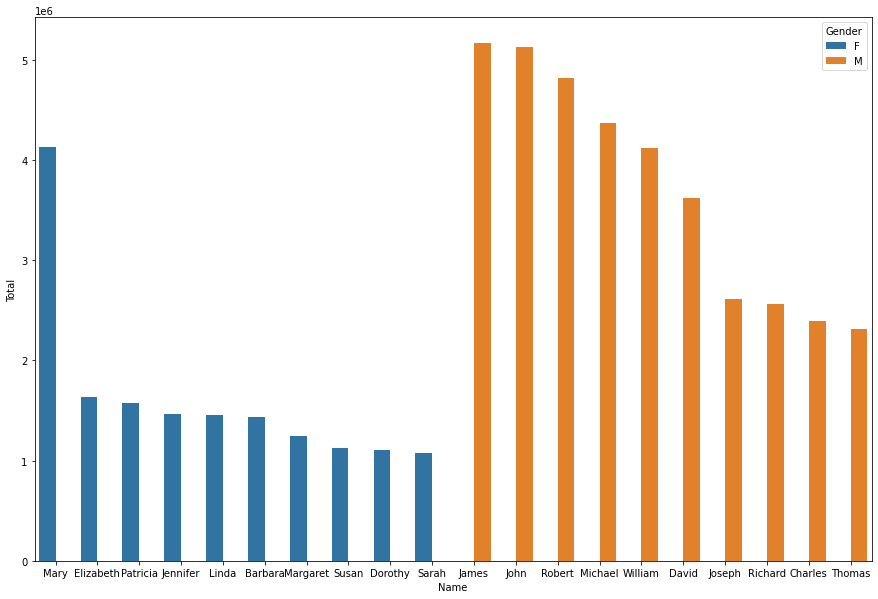

In [35]:
plt.figure(figsize =(15,10))
sns.barplot(x="Name", y ="Total", data = all_times, hue = "Gender")
plt.show()

## Checking (1880 - 2019)

In [36]:
pd.options.display.float_format= '{:.0f}'.format

In [37]:
babies_per_year = df.groupby("Year").Count.sum()

In [38]:
babies_per_year

Year
1880     201484
1881     192696
1882     221533
1883     216944
1884     243461
         ...   
2014    3698914
2015    3691990
2016    3657797
2017    3561975
2018    3487353
Name: Count, Length: 139, dtype: int64

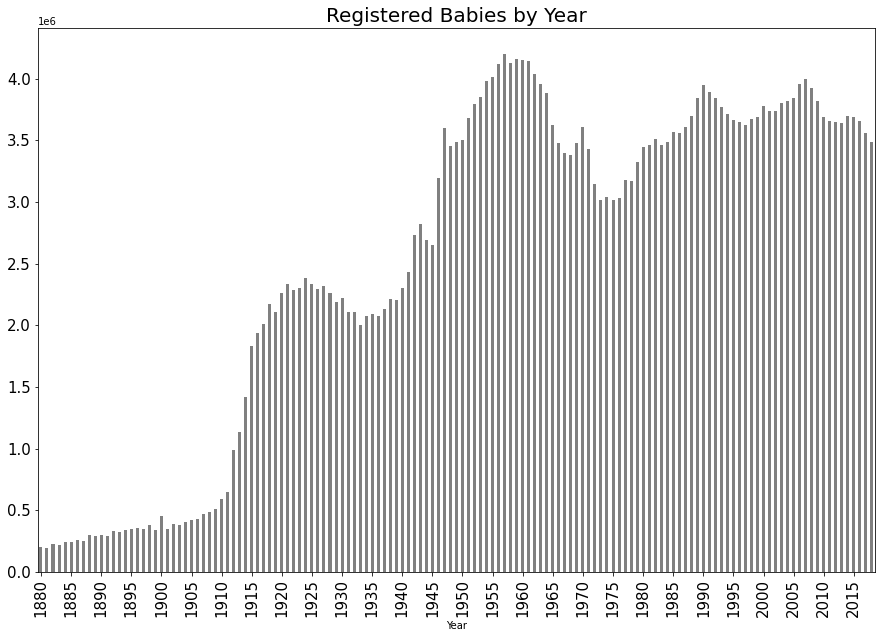

In [39]:
babies_per_year.plot(kind = "bar", y= "Count", figsize = (15, 10), fontsize = 15, color = 'grey')
plt.xticks(ticks = (range(0, len(babies_per_year), 5)), labels =  range(1880, 2019, 5))
plt.title("Registered Babies by Year", fontsize = 20)
plt.show()

In [40]:
differents_names= df.groupby("Year").Name.count()

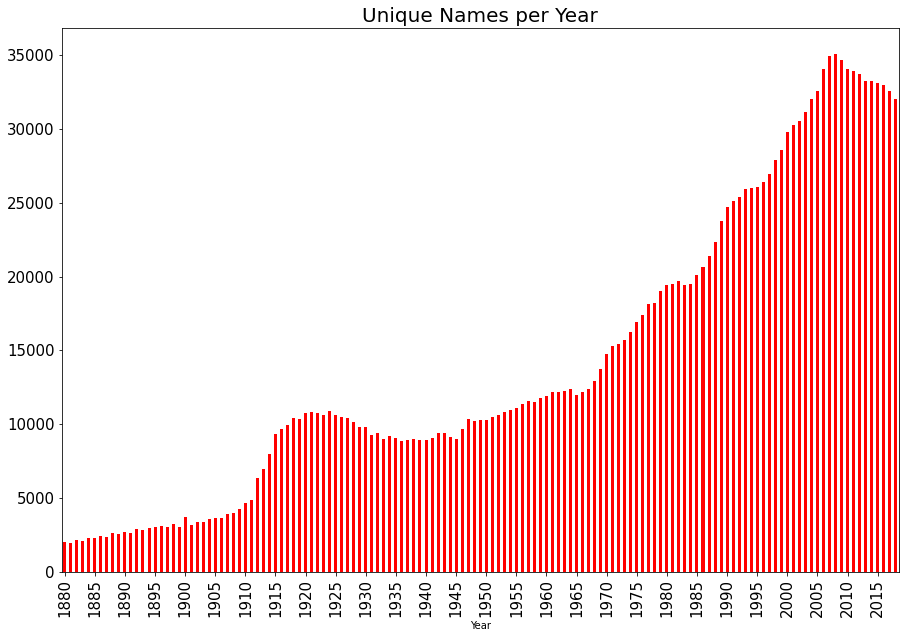

In [41]:
differents_names.plot(kind = "bar", figsize = (15, 10), fontsize = 15, color = "red")
plt.xticks(ticks = (range(0, len(differents_names), 5)), labels =  range(1880, 2019, 5))
plt.title("Unique Names per Year", fontsize = 20)
plt.show()

## Popularity Rank

In [42]:
df.groupby(["Year", "Gender"]).Count.transform("sum")

0            90994
1            90994
2            90994
3            90994
4            90994
            ...   
1957041    1800392
1957042    1800392
1957043    1800392
1957044    1800392
1957045    1800392
Name: Count, Length: 1957046, dtype: int64

In [43]:
df.Count.div(df.groupby(["Year", "Gender"]).Count.transform("sum"))*1000000

0         77642
1         28617
2         22012
3         21309
4         19188
           ... 
1957041       3
1957042       3
1957043       3
1957044       3
1957045       3
Name: Count, Length: 1957046, dtype: float64

In [44]:
df["Popularity"] = df.Count.div(df.groupby(["Year", "Gender"]).Count.transform("sum"))*1000000

In [45]:
df

,Year,Name,Gender,Count,Popularity
0,1880,Mary,F,7065,77642
1,1880,Anna,F,2604,28617
2,1880,Emma,F,2003,22012
3,1880,Elizabeth,F,1939,21309
4,1880,Minnie,F,1746,19188
...,...,...,...,...,...
1957041,2018,Zylas,M,5,3
1957042,2018,Zyran,M,5,3
1957043,2018,Zyrie,M,5,3
1957044,2018,Zyron,M,5,3


## Rank

In [46]:
df.groupby(["Year", "Gender"]).Count.apply(lambda x: x.rank(ascending = False))



0             1
1             2
2             3
3             4
4             5
           ... 
1957041   13042
1957042   13042
1957043   13042
1957044   13042
1957045   13042
Name: Count, Length: 1957046, dtype: float64

In [47]:
df["Rank"] =  df.groupby(["Year", "Gender"]).Count.apply(lambda x: x.rank(ascending = False))



In [48]:
df


,Year,Name,Gender,Count,Popularity,Rank
0,1880,Mary,F,7065,77642,1
1,1880,Anna,F,2604,28617,2
2,1880,Emma,F,2003,22012,3
3,1880,Elizabeth,F,1939,21309,4
4,1880,Minnie,F,1746,19188,5
...,...,...,...,...,...,...
1957041,2018,Zylas,M,5,3,13042
1957042,2018,Zyran,M,5,3,13042
1957043,2018,Zyrie,M,5,3,13042
1957044,2018,Zyron,M,5,3,13042


In [49]:

df[(df.Year == 2018) & (df.Gender == "M")].tail(60)



,Year,Name,Gender,Count,Popularity,Rank
1956986,2018,Zachry,M,5,3,13042
1956987,2018,Zaeed,M,5,3,13042
1956988,2018,Zahavi,M,5,3,13042
1956989,2018,Zaheir,M,5,3,13042
1956990,2018,Zahyan,M,5,3,13042
1956991,2018,Zaidenn,M,5,3,13042
1956992,2018,Zaier,M,5,3,13042
1956993,2018,Zailyn,M,5,3,13042
1956994,2018,Zaion,M,5,3,13042
1956995,2018,Zakery,M,5,3,13042


In [50]:
df[(df.Year == 2018) & (df.Gender == "M")].Popularity.sum()

999999.9999999999

### Visualizing Name Trends over Time

In [51]:
mary = df[(df.Name == "Mary") & (df.Gender == "F")]
mary.tail(60)

,Year,Name,Gender,Count,Popularity,Rank
560704,1959,Mary,F,54474,26927,1
572471,1960,Mary,F,51475,25457,1
584392,1961,Mary,F,47680,23632,1
596575,1962,Mary,F,43486,22113,2
608784,1963,Mary,F,41550,21559,2
621066,1964,Mary,F,40990,21633,2
633463,1965,Mary,F,34270,19416,2
645416,1966,Mary,F,28884,17072,3
657568,1967,Mary,F,25313,15333,4
669967,1968,Mary,F,21725,13245,6


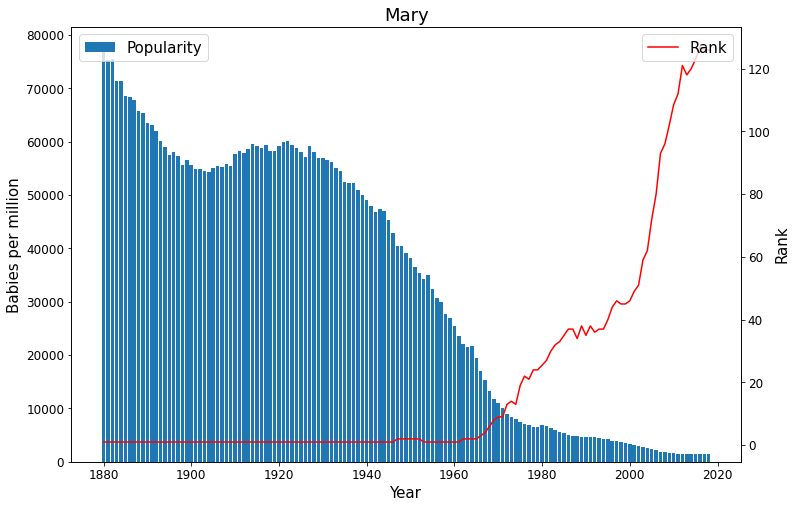

In [52]:
fig, ax1 = plt.subplots(figsize = (12, 8))
ax1.bar(x = mary.Year, height= mary.Popularity, label = "Popularity")
ax2 = ax1.twinx()
ax2.plot(mary.Year, mary.Rank, color = "red", label = "Rank")
ax1.set_xlabel("Year", fontsize = 15)
ax1.set_ylabel("Babies per million", fontsize = 15)
ax2.set_ylabel("Rank", fontsize = 15)
ax1.set_title("Mary", fontsize = 18)
ax1.tick_params(labelsize = 12)
ax2.tick_params(labelsize = 12)
ax1.legend(loc = 2, fontsize = 15)
ax2.legend(loc = 1, fontsize = 15)
plt.show()

In [53]:
def plot_name(name, gender, crit = "Popularity"):
    data = df.loc[(df.Name == name) & (df.Gender == gender), ["Name", "Gender", "Year", "Rank", crit]]
    data = data.set_index("Year")
    
    fig, ax1 = plt.subplots(figsize = (12, 8))
    ax1.bar(x = data.index, height= data[crit], label = crit)
    ax2 = ax1.twinx()
    ax2.plot(data.index, data.Rank, color = "red", label = "Rank")
    ax1.set_xlabel("Year", fontsize = 15)
    ax1.set_ylabel(crit, fontsize = 15)
    ax2.set_ylabel("Rank", fontsize = 15)
    ax1.set_title(name, fontsize = 18)
    ax1.tick_params(labelsize = 12)
    ax2.tick_params(labelsize = 12)
    ax1.legend(loc = 2, fontsize = 15)
    ax2.legend(loc = 1, fontsize = 15)
    plt.show()

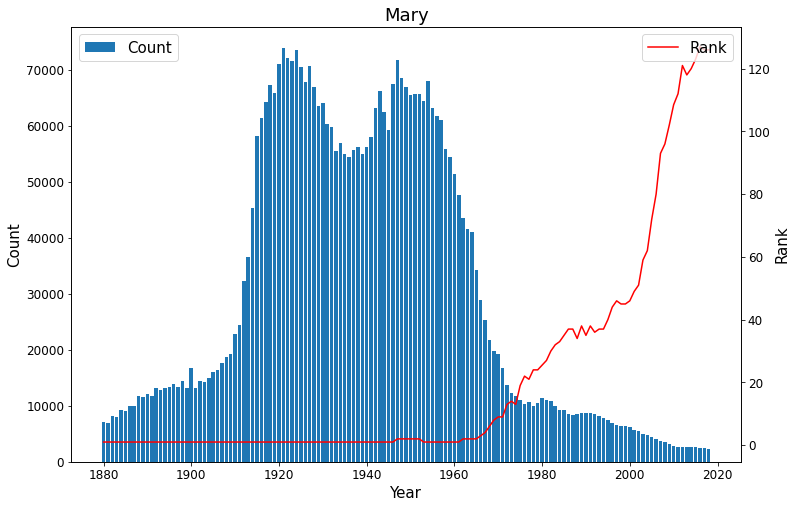

In [54]:
plot_name("Mary", "F", crit = "Count")

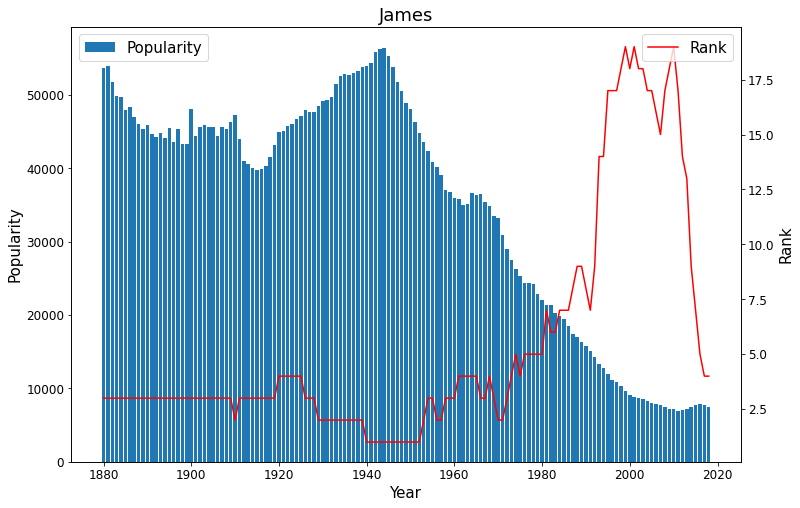

In [55]:
plot_name("James", "M", crit = "Popularity")

In [56]:
m_evergreen

,Name,Count_2018,Count_1880
0,William,14516,9532
1,James,13525,5927
2,Henry,10649,2444


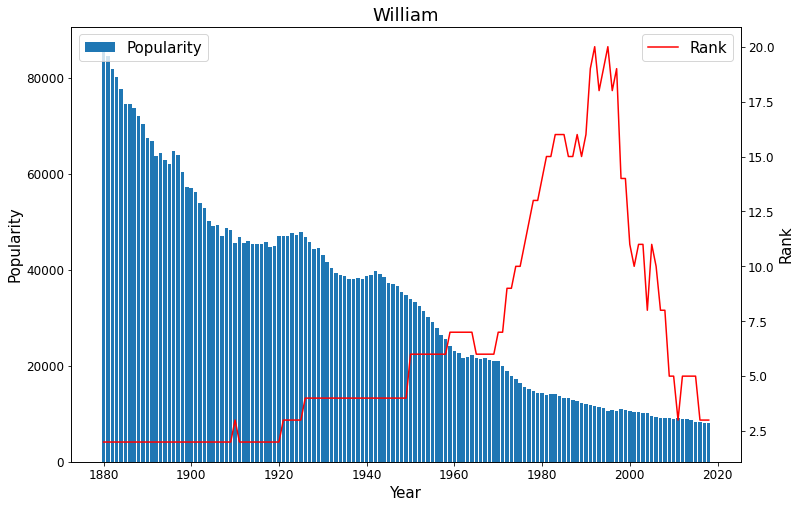

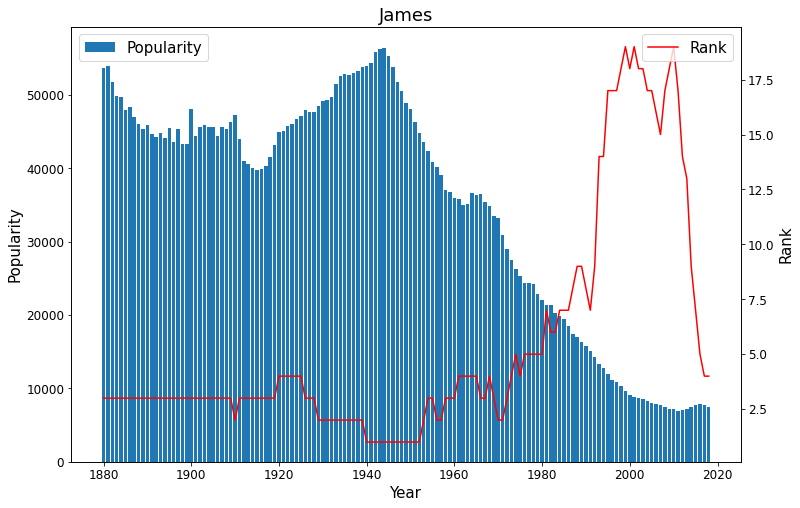

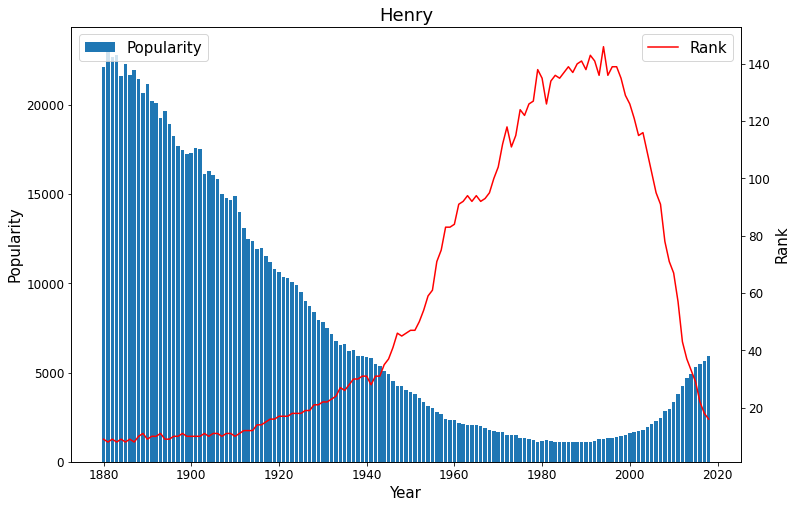

In [57]:
for name in m_evergreen.Name:
    plot_name(name, "M", crit = "Popularity")

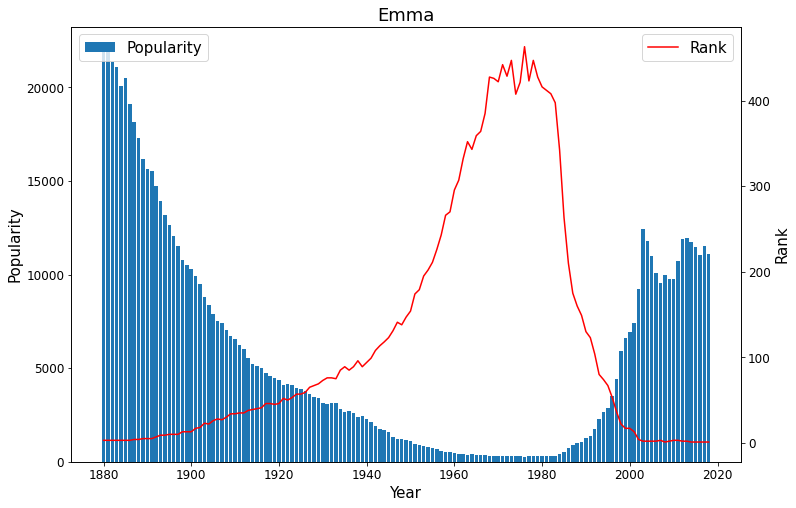

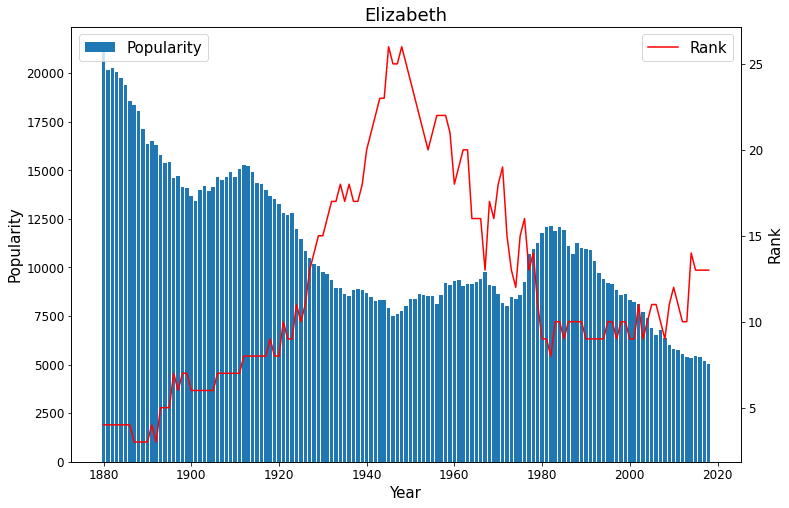

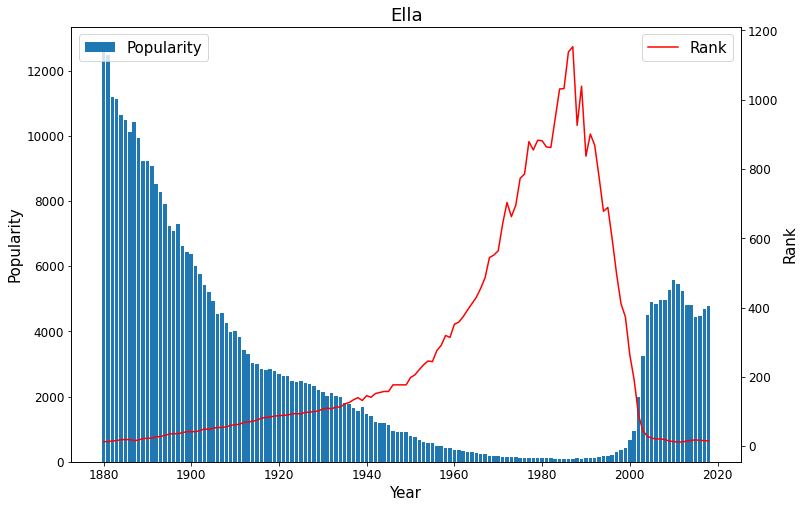

In [58]:
for name in f_evergreen.Name:
    plot_name(name, "F", crit = "Popularity")

### Why does a Name´s Popularity suddenly change? (Part 1)

In [60]:
df.loc[(df.Name == "Mary") & (df.Gender == "F"), "Popularity"].shift()

0           nan
2000      77642
3935      75245
6062      75551
8146      71333
           ... 
1793168    1514
1826414    1477
1859539    1478
1892548    1420
1925138    1397
Name: Popularity, Length: 139, dtype: float64

In [61]:
df["Pop_lag1"] = df.groupby(["Name", "Gender"]).Popularity.shift()

In [62]:
df

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag1
0,1880,Mary,F,7065,77642,1,nan
1,1880,Anna,F,2604,28617,2,nan
2,1880,Emma,F,2003,22012,3,nan
3,1880,Elizabeth,F,1939,21309,4,nan
4,1880,Minnie,F,1746,19188,5,nan
...,...,...,...,...,...,...,...
1957041,2018,Zylas,M,5,3,13042,4
1957042,2018,Zyran,M,5,3,13042,3
1957043,2018,Zyrie,M,5,3,13042,3
1957044,2018,Zyron,M,5,3,13042,8


In [63]:
df[df.Name == "Ashanti"]

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag1
700697,1970,Ashanti,F,14,8,4142,nan
708512,1970,Ashanti,M,14,8,2565,nan
714597,1971,Ashanti,F,21,13,3216,8
724746,1971,Ashanti,M,8,5,3809,8
729787,1972,Ashanti,F,21,14,3117,13
...,...,...,...,...,...,...,...
1827752,2015,Ashanti,F,157,88,1464,103
1857597,2015,Ashanti,M,5,3,13046,3
1860841,2016,Ashanti,F,161,91,1432,88
1893982,2017,Ashanti,F,140,81,1562,91


In [64]:
df.loc[(df.Year > 1880) & (df.Pop_lag1.isna()), "Pop_lag1"] = 0

In [65]:
df[df.Name == "Ashanti"]

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag1
700697,1970,Ashanti,F,14,8,4142,0
708512,1970,Ashanti,M,14,8,2565,0
714597,1971,Ashanti,F,21,13,3216,8
724746,1971,Ashanti,M,8,5,3809,8
729787,1972,Ashanti,F,21,14,3117,13
...,...,...,...,...,...,...,...
1827752,2015,Ashanti,F,157,88,1464,103
1857597,2015,Ashanti,M,5,3,13046,3
1860841,2016,Ashanti,F,161,91,1432,88
1893982,2017,Ashanti,F,140,81,1562,91


In [66]:
df["Pop_diff"] = df.Popularity - df.Pop_lag1

In [67]:
df[(df.Name == "Mary") & (df.Gender == "F")]

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag1,Pop_diff
0,1880,Mary,F,7065,77642,1,nan,nan
2000,1881,Mary,F,6919,75245,1,77642,-2398
3935,1882,Mary,F,8148,75551,1,75245,307
6062,1883,Mary,F,8012,71333,1,75551,-4219
8146,1884,Mary,F,9217,71439,1,71333,107
...,...,...,...,...,...,...,...,...
1793168,2014,Mary,F,2632,1477,120,1514,-37
1826414,2015,Mary,F,2631,1478,123,1477,1
1859539,2016,Mary,F,2508,1420,127,1478,-58
1892548,2017,Mary,F,2402,1397,126,1420,-23


In [68]:
df[df.Name == "Ashanti"]

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag1,Pop_diff
700697,1970,Ashanti,F,14,8,4142,0,8
708512,1970,Ashanti,M,14,8,2565,0,8
714597,1971,Ashanti,F,21,13,3216,8,5
724746,1971,Ashanti,M,8,5,3809,8,-3
729787,1972,Ashanti,F,21,14,3117,13,1
...,...,...,...,...,...,...,...,...
1827752,2015,Ashanti,F,157,88,1464,103,-15
1857597,2015,Ashanti,M,5,3,13046,3,-0
1860841,2016,Ashanti,F,161,91,1432,88,3
1893982,2017,Ashanti,F,140,81,1562,91,-10


In [69]:
df2 = df[df.Year >= 1900].copy()

In [70]:
df2

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag1,Pop_diff
52265,1900,Mary,F,16706,55724,1,56527,-802
52266,1900,Helen,F,6343,21158,2,21663,-506
52267,1900,Anna,F,6114,20394,3,21951,-1557
52268,1900,Margaret,F,5304,17692,4,18234,-542
52269,1900,Ruth,F,4765,15894,5,16788,-894
...,...,...,...,...,...,...,...,...
1957041,2018,Zylas,M,5,3,13042,4,-1
1957042,2018,Zyran,M,5,3,13042,3,-0
1957043,2018,Zyrie,M,5,3,13042,3,0
1957044,2018,Zyron,M,5,3,13042,8,-5


In [71]:
df2.nlargest(20, "Pop_diff")

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag1,Pop_diff
431066,1947,Linda,F,99689,56236,1,33547,22689
321479,1935,Shirley,F,42358,40398,2,21874,18524
922468,1983,Ashley,F,33293,19930,4,8775,11156
711426,1971,Jennifer,F,56783,34134,1,26403,7730
726721,1972,Jennifer,F,63603,41813,1,34134,7680
312301,1934,Shirley,F,22840,21874,4,14203,7671
645417,1966,Michelle,F,27151,16047,4,9186,6861
751941,1973,Jason,M,46683,29940,3,23081,6859
844807,1979,Amanda,F,31928,19890,3,13394,6496
696647,1970,Jennifer,F,46157,26403,1,19978,6425


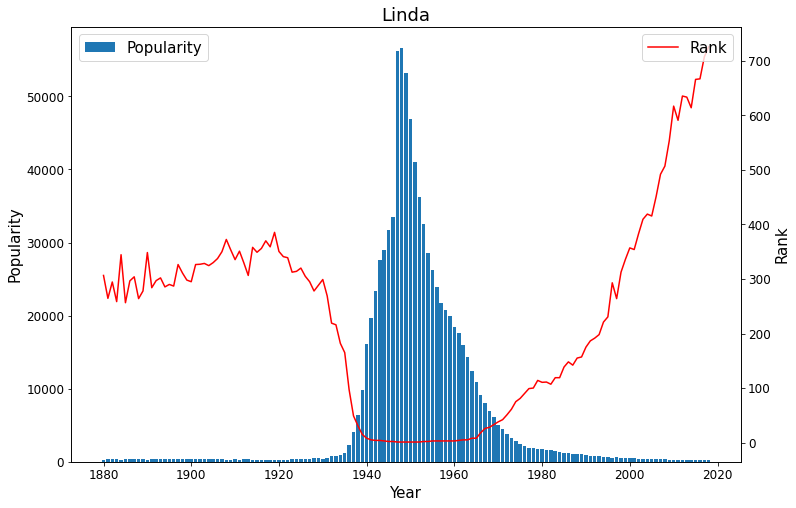

In [72]:
plot_name("Linda", "F")

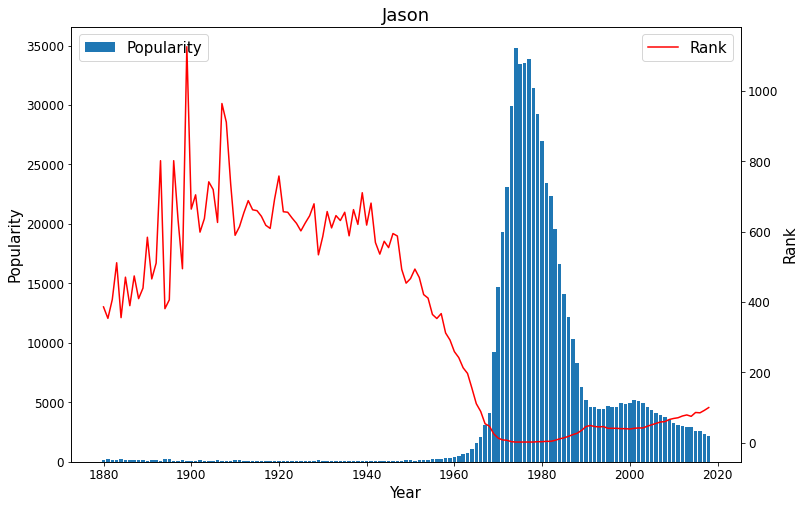

In [73]:
plot_name("Jason", "M")

In [74]:
df2.nsmallest(20, "Pop_diff")

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag1,Pop_diff
339412,1937,Shirley,F,26816,25204,4,33798,-8593
330516,1936,Shirley,F,35161,33798,2,40398,-6601
461947,1950,Linda,F,80431,46952,1,53199,-6248
472250,1951,Linda,F,73978,41079,1,46952,-5872
961380,1985,Jennifer,F,42651,24789,3,30032,-5243
482712,1952,Linda,F,67082,36174,1,41079,-4905
696648,1970,Lisa,F,38963,22288,2,26692,-4404
437173,1947,Richard,M,58521,31990,5,36252,-4263
537623,1957,Deborah,F,40071,19601,6,23827,-4226
504196,1954,Linda,F,55381,28520,2,32572,-4052


## Why does a Name´s Popularity suddenly change? (Part 2)

In [75]:
df2[(df2.Pop_lag1 < 5)].nlargest(20, "Pop_diff")

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag1,Pop_diff
758040,1974,Nakia,F,1134,773,226,5,768
808621,1977,Kizzy,F,1116,728,223,0,728
1060680,1989,Christop,M,1082,541,242,0,541
768358,1974,Nakia,M,612,389,302,0,389
820064,1977,Levar,M,523,318,342,0,318
645832,1966,Tabatha,F,500,296,419,3,293
1553888,2007,Jaslene,F,501,261,600,3,258
1223510,1996,Moesha,F,426,243,548,0,243
1070200,1990,Isamar,F,446,235,534,0,235
961890,1985,Sade,F,393,228,512,0,228


In [76]:
df2[df2.Name == "Nakia"]

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag1,Pop_diff
749309,1973,Nakia,F,7,5,7049,0,5
758040,1974,Nakia,F,1134,773,226,5,768
768358,1974,Nakia,M,612,389,302,0,389
774314,1975,Nakia,F,972,667,251,773,-106
785009,1975,Nakia,M,514,329,338,389,-60
...,...,...,...,...,...,...,...,...
1834158,2015,Nakia,F,15,8,7792,11,-2
1854673,2015,Nakia,M,8,4,9138,5,-1
1865530,2016,Nakia,F,21,12,6072,8,3
1906059,2017,Nakia,F,7,4,13370,12,-8


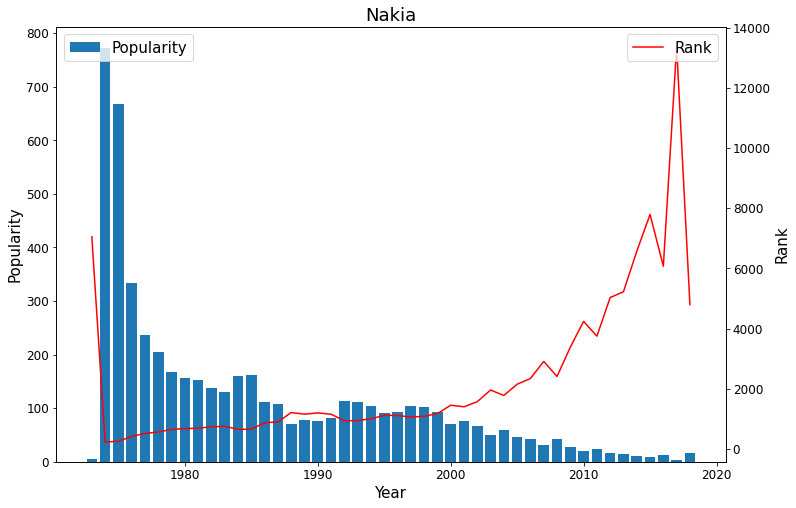

In [77]:
plot_name("Nakia", "F")

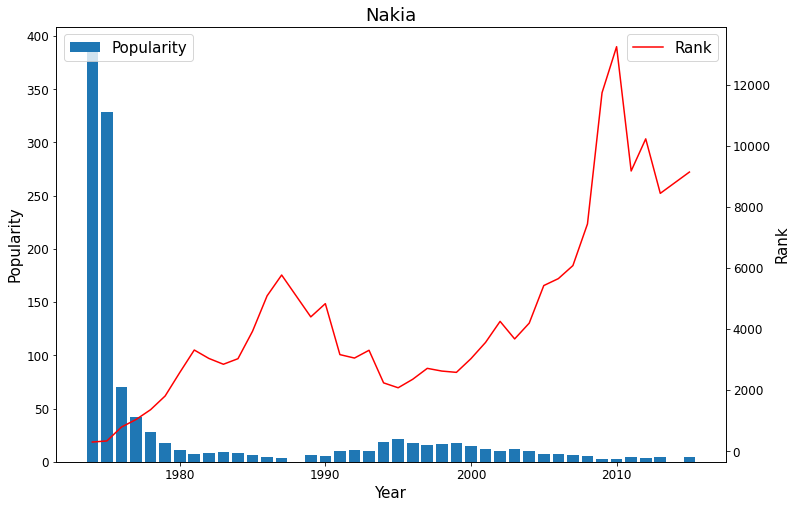

In [78]:
plot_name("Nakia", "M")

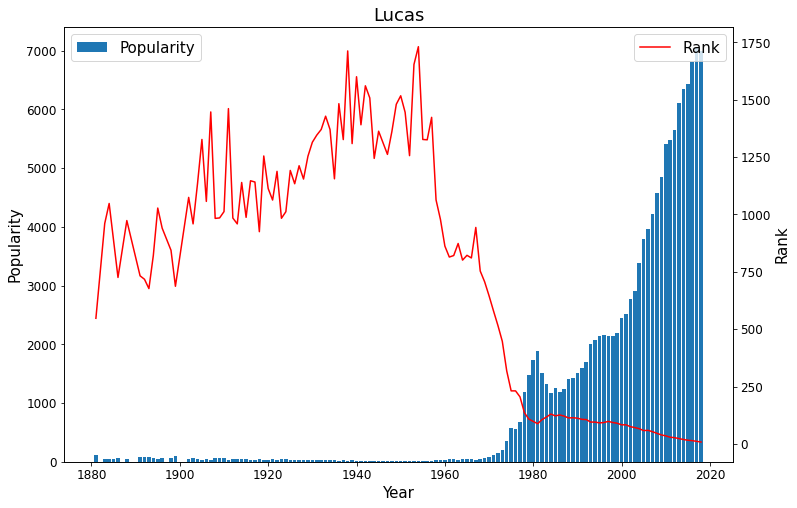

In [79]:
plot_name("Lucas", "M")

In [80]:
df2["%change"] = df2.Popularity.div(df2.Pop_lag1).sub(1).mul(100)

In [81]:
df2

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag1,Pop_diff,%change
52265,1900,Mary,F,16706,55724,1,56527,-802,-1
52266,1900,Helen,F,6343,21158,2,21663,-506,-2
52267,1900,Anna,F,6114,20394,3,21951,-1557,-7
52268,1900,Margaret,F,5304,17692,4,18234,-542,-3
52269,1900,Ruth,F,4765,15894,5,16788,-894,-5
...,...,...,...,...,...,...,...,...,...
1957041,2018,Zylas,M,5,3,13042,4,-1,-27
1957042,2018,Zyran,M,5,3,13042,3,-0,-12
1957043,2018,Zyrie,M,5,3,13042,3,0,2
1957044,2018,Zyron,M,5,3,13042,8,-5,-66


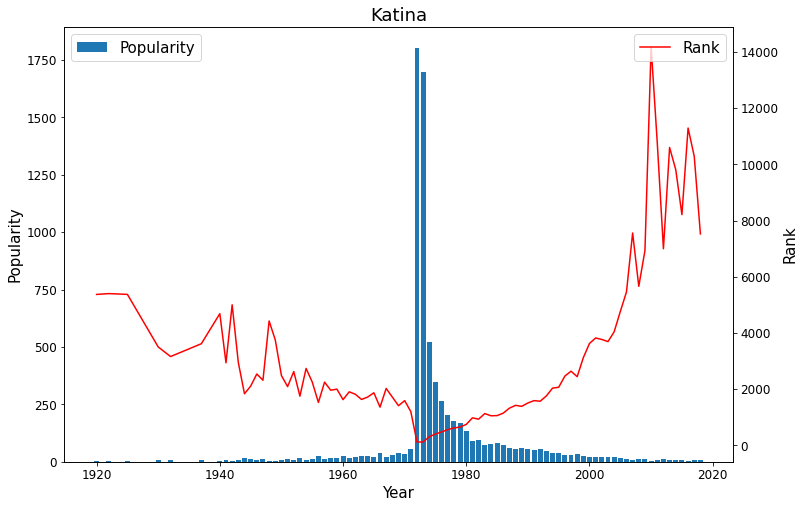

In [82]:
plot_name("Katina", "F")

## Persistant vs. Spike-Fade Names

In [83]:
agg

,Name,Gender,Total,No_year,First_year,Last_year,Max_count,Best_year
0,Aaban,F,nan,0,0,0,nan,nan
1,Aaban,M,114,11,11,11,16,2014
2,Aabha,F,35,5,5,5,9,2014
3,Aabha,M,nan,0,0,0,nan,nan
4,Aabid,F,nan,0,0,0,nan,nan
...,...,...,...,...,...,...,...,...
196795,Zyyanna,M,nan,0,0,0,nan,nan
196796,Zyyon,F,nan,0,0,0,nan,nan
196797,Zyyon,M,6,1,1,1,6,2014
196798,Zzyzx,F,nan,0,0,0,nan,nan


In [85]:
agg["Spike_Score"] = agg.Max_count.div(agg.Total).mul(100)

In [86]:
agg

,Name,Gender,Total,No_year,First_year,Last_year,Max_count,Best_year,Spike_Score
0,Aaban,F,nan,0,0,0,nan,nan,nan
1,Aaban,M,114,11,11,11,16,2014,14
2,Aabha,F,35,5,5,5,9,2014,26
3,Aabha,M,nan,0,0,0,nan,nan,nan
4,Aabid,F,nan,0,0,0,nan,nan,nan
...,...,...,...,...,...,...,...,...,...
196795,Zyyanna,M,nan,0,0,0,nan,nan,nan
196796,Zyyon,F,nan,0,0,0,nan,nan,nan
196797,Zyyon,M,6,1,1,1,6,2014,100
196798,Zzyzx,F,nan,0,0,0,nan,nan,nan


In [87]:
agg.sort_values(by = "Spike_Score", ascending = True).head(20)

,Name,Gender,Total,No_year,First_year,Last_year,Max_count,Best_year,Spike_Score
88407,Joseph,M,2613304,139,139,139,32732,1956,1
55100,Elizabeth,F,1638349,139,139,139,20744,1990,1
152976,Rosa,F,174125,139,139,139,2230,1925,1
124465,Maurice,M,134504,139,139,139,1743,1921,1
45648,Delia,F,36276,139,139,139,491,1957,1
38023,Cornelius,M,35764,139,139,139,485,1974,1
50293,Domingo,M,13797,121,121,121,190,1946,1
123019,Marshall,M,91352,139,139,139,1270,1947,1
175971,Teodoro,M,3079,111,111,111,43,1969,1
186037,Victor,M,317673,139,139,139,4444,1990,1


In [88]:
pers = agg.sort_values(by = "Spike_Score", ascending = True).head(20)

In [89]:
pers

,Name,Gender,Total,No_year,First_year,Last_year,Max_count,Best_year,Spike_Score
88407,Joseph,M,2613304,139,139,139,32732,1956,1
55100,Elizabeth,F,1638349,139,139,139,20744,1990,1
152976,Rosa,F,174125,139,139,139,2230,1925,1
124465,Maurice,M,134504,139,139,139,1743,1921,1
45648,Delia,F,36276,139,139,139,491,1957,1
38023,Cornelius,M,35764,139,139,139,485,1974,1
50293,Domingo,M,13797,121,121,121,190,1946,1
123019,Marshall,M,91352,139,139,139,1270,1947,1
175971,Teodoro,M,3079,111,111,111,43,1969,1
186037,Victor,M,317673,139,139,139,4444,1990,1


In [90]:
l = list(zip(pers.Name, pers.Gender))
l

[('Joseph', 'M'),
 ('Elizabeth', 'F'),
 ('Rosa', 'F'),
 ('Maurice', 'M'),
 ('Delia', 'F'),
 ('Cornelius', 'M'),
 ('Domingo', 'M'),
 ('Marshall', 'M'),
 ('Teodoro', 'M'),
 ('Victor', 'M'),
 ('Nelson', 'M'),
 ('Sina', 'F'),
 ('Lovell', 'M'),
 ('Katheryn', 'F'),
 ('Zenobia', 'F'),
 ('Theron', 'M'),
 ('Alida', 'F'),
 ('Alfonso', 'M'),
 ('Manuel', 'M'),
 ('Jessie', 'M')]

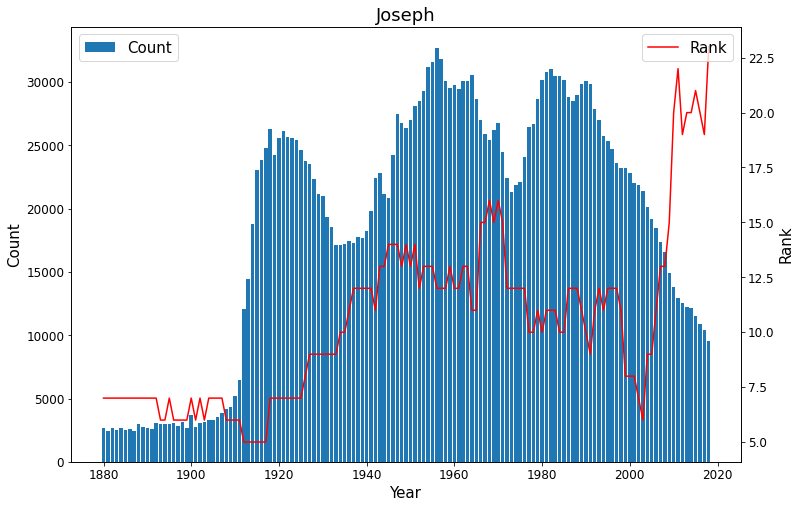

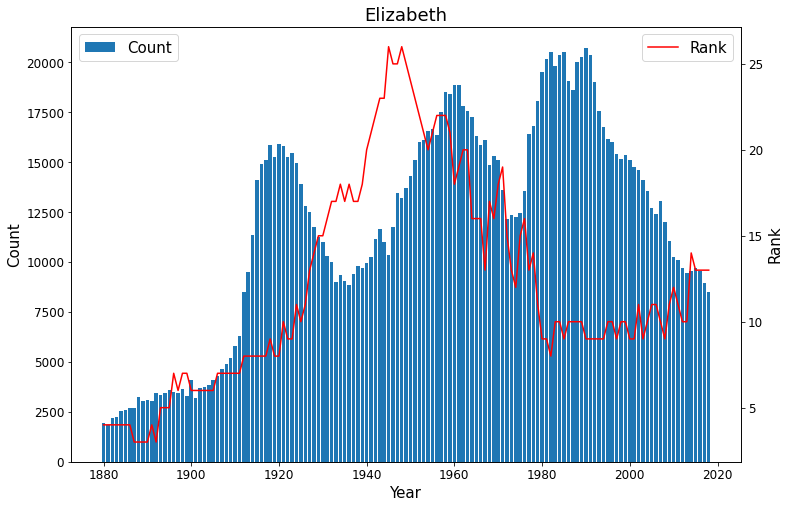

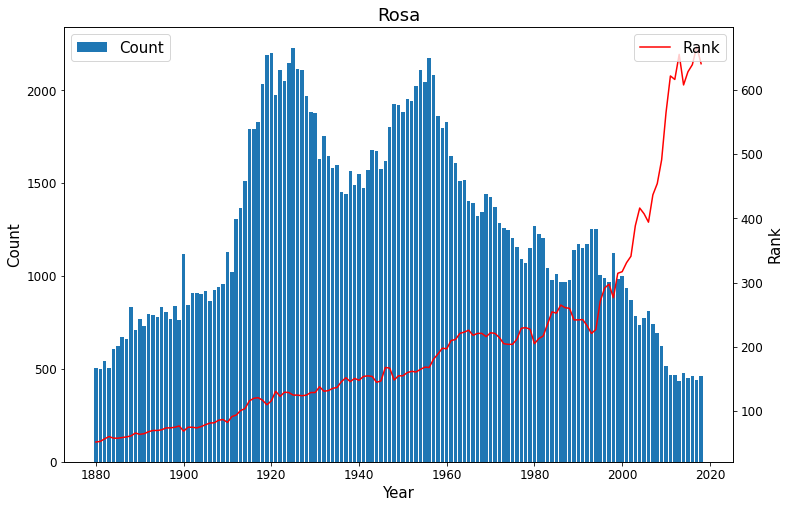

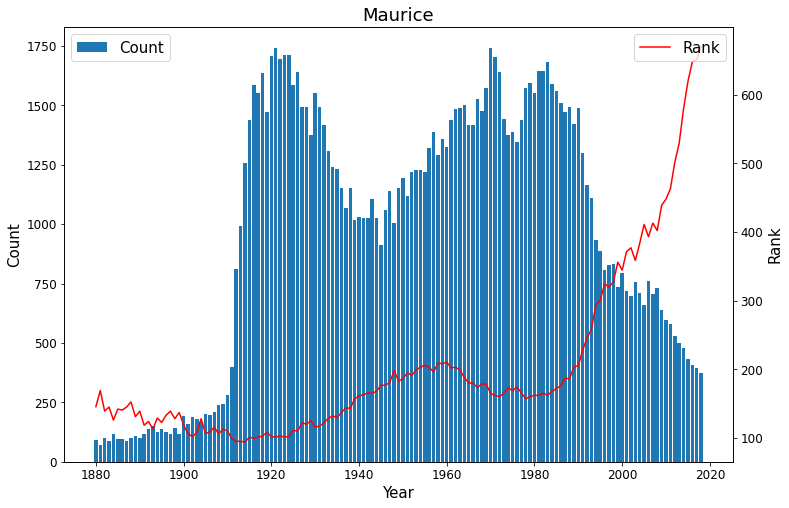

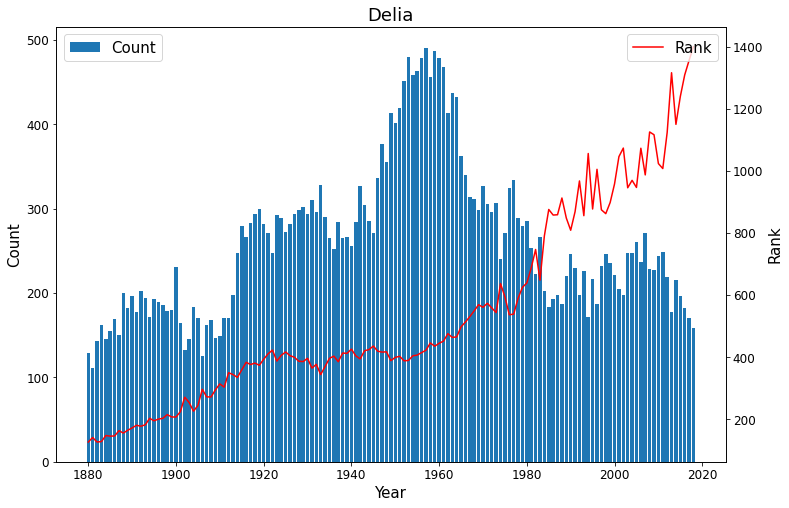

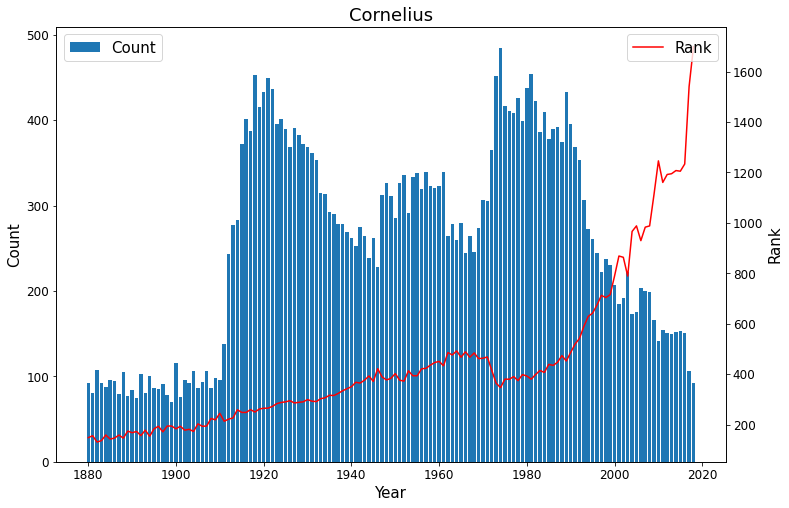

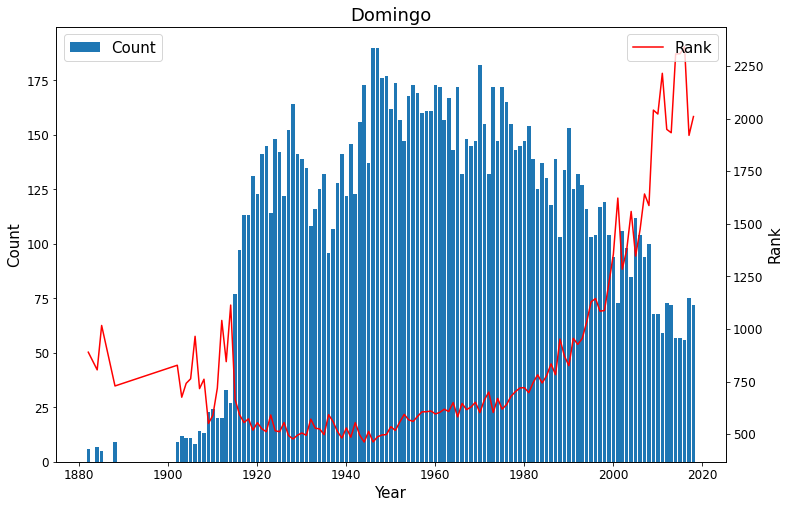

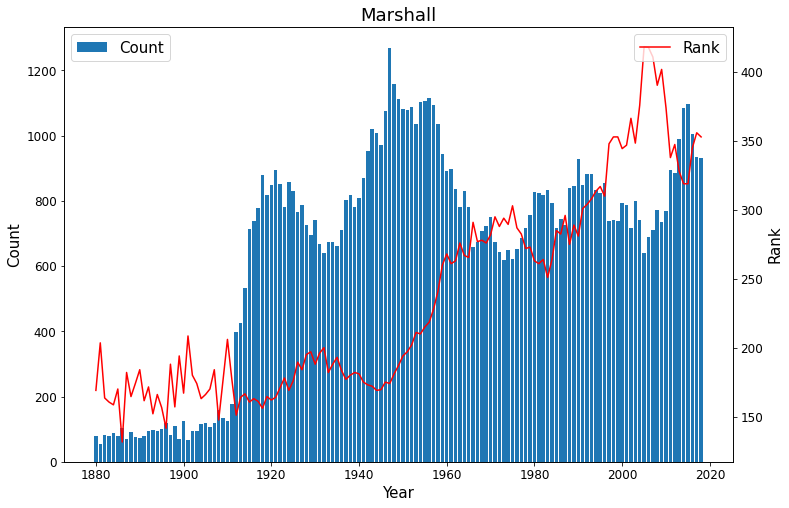

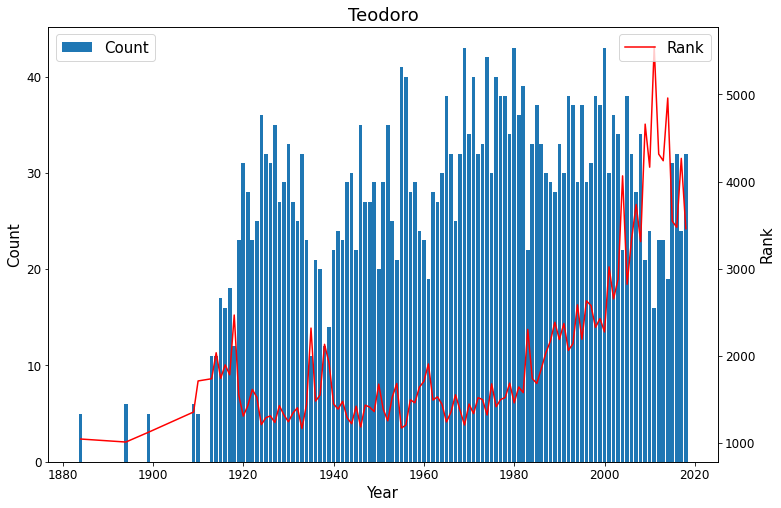

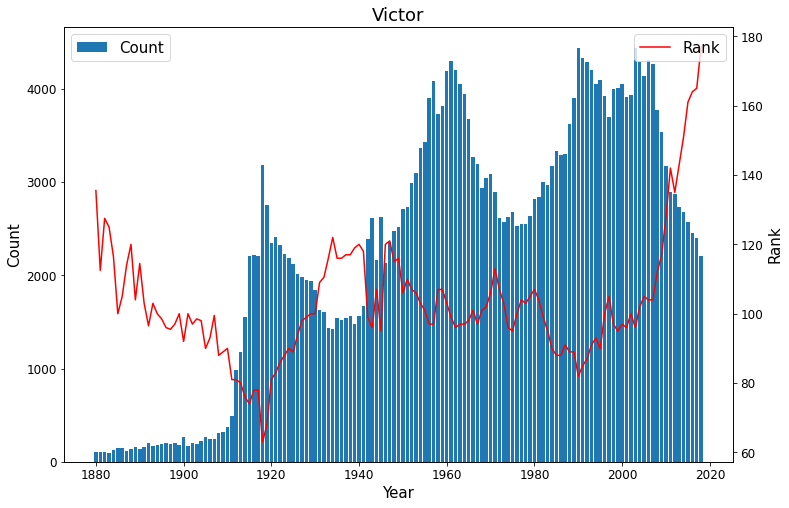

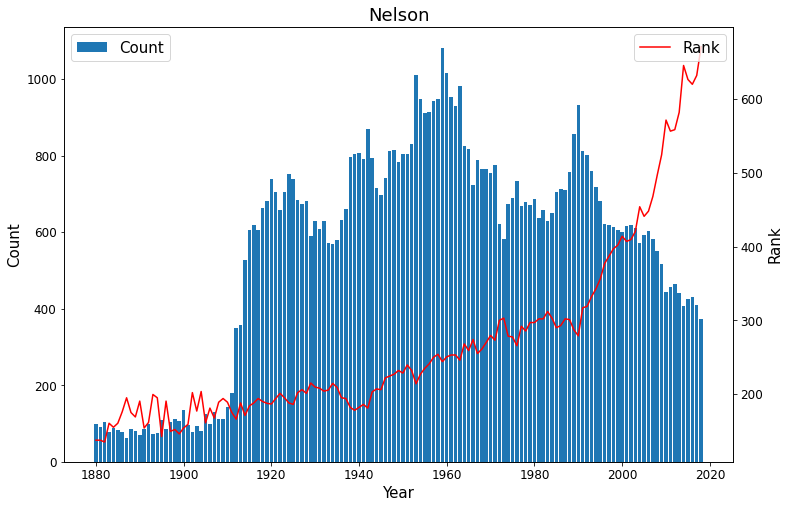

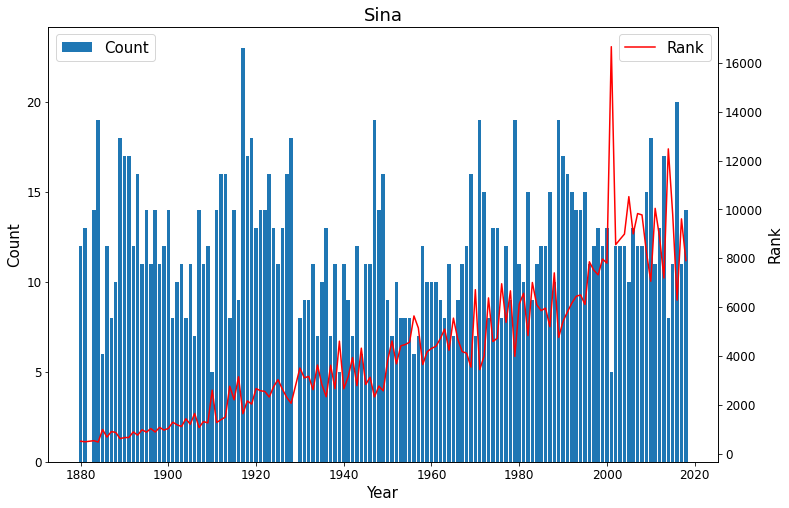

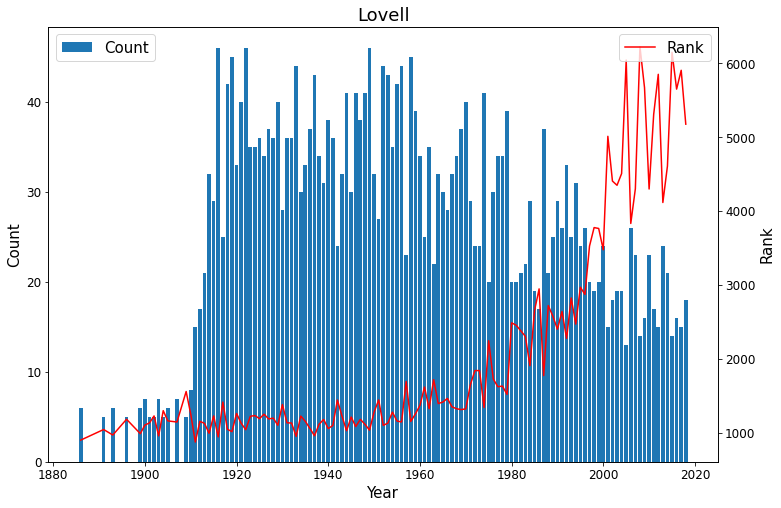

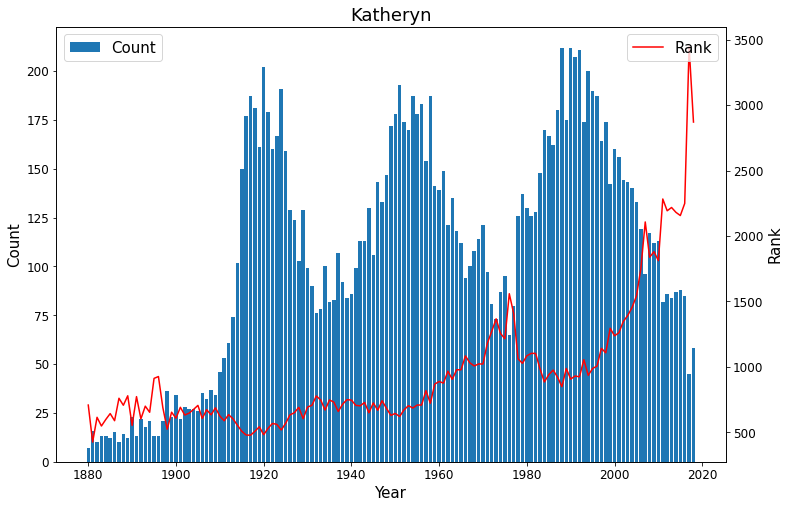

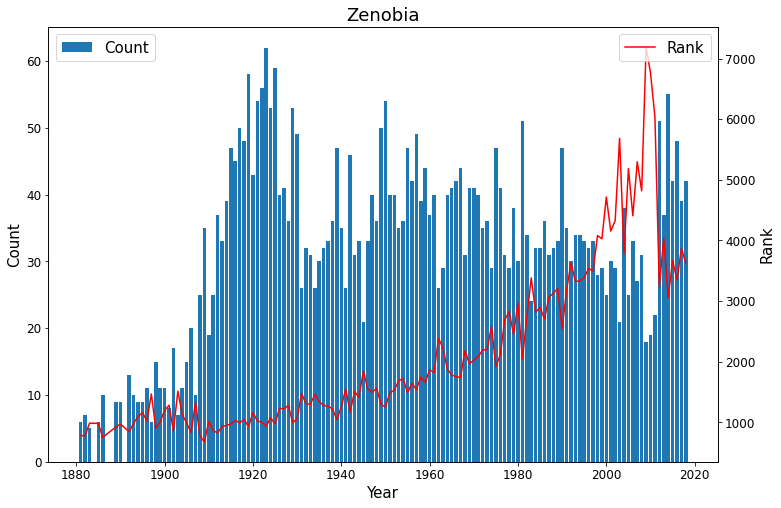

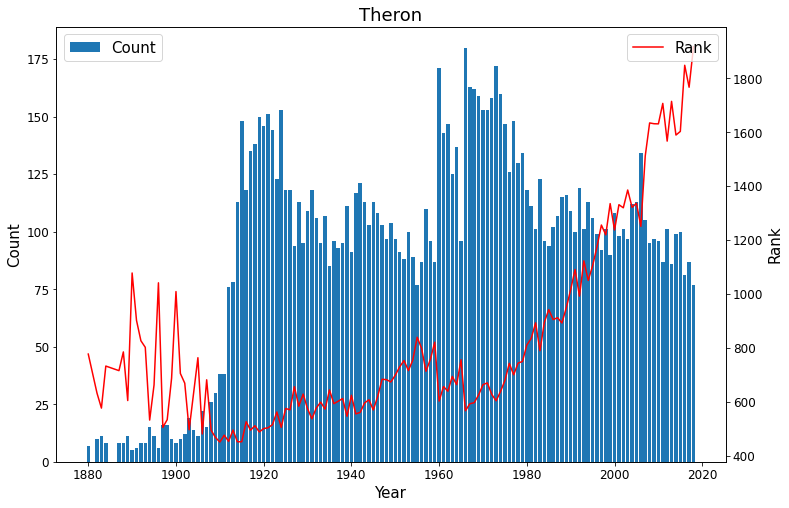

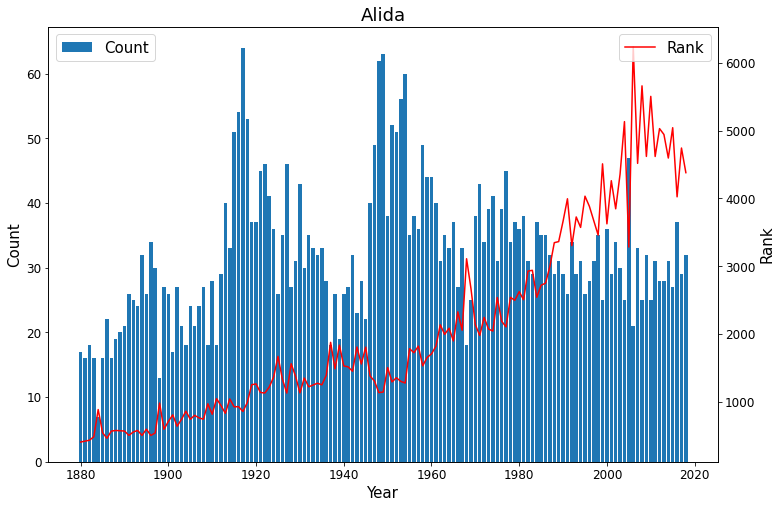

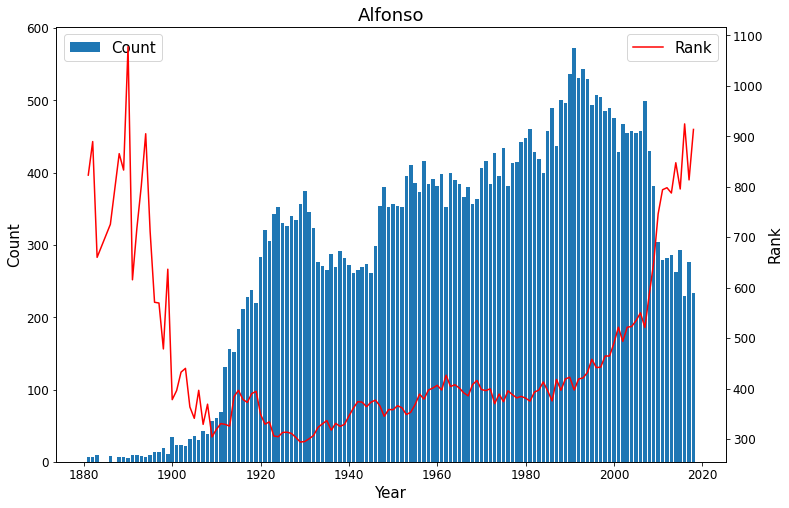

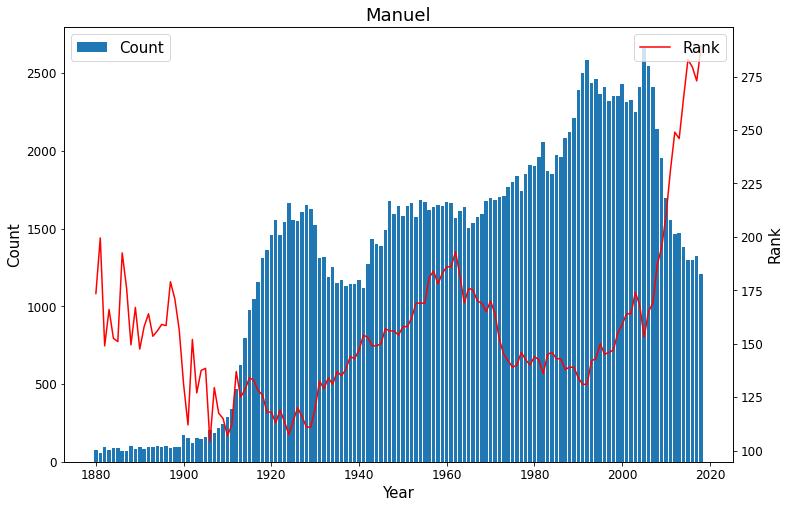

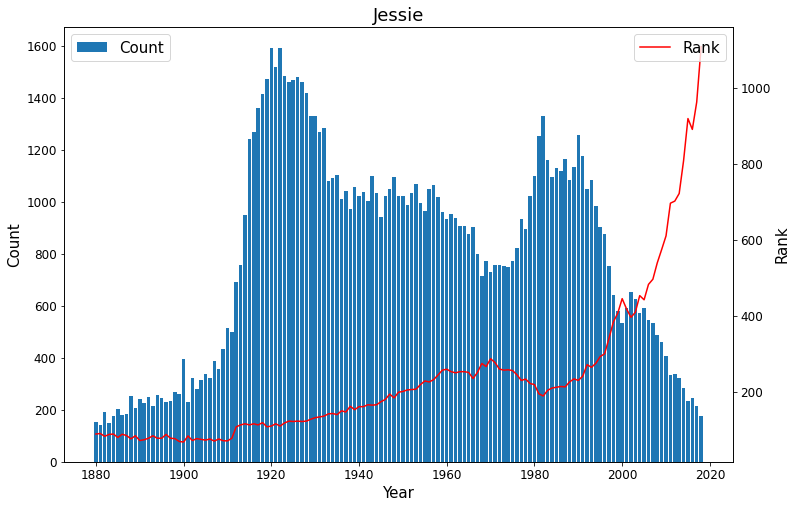

In [91]:
for name in l:
    plot_name(name = name[0], gender = name[1], crit = "Count")

In [94]:
spike = agg[(agg.Total > 1000) & (agg.No_year > 10)].sort_values(by = "Spike_Score",
                                                                 ascending = False).head(20)
spike

,Name,Gender,Total,No_year,First_year,Last_year,Max_count,Best_year,Spike_Score
102318,Kizzy,F,2325,30,30,30,1116,1977,48
139106,Oaklyn,F,1381,11,11,11,627,2018,45
46674,Deneen,F,3603,52,52,52,1604,1964,45
129832,Moesha,F,1067,14,14,14,426,1996,40
120964,Mareli,F,1038,22,22,22,411,2008,40
120982,Marely,F,2606,29,29,29,1004,2008,39
93217,Kanye,M,1334,17,17,17,509,2004,38
91575,Kairo,M,1632,24,24,24,605,2018,37
175916,Tennille,F,2172,32,32,32,769,1976,35
57410,Ensley,F,1241,20,20,20,432,2018,35


In [95]:
l2 = list(zip(spike.Name, spike.Gender))
l2

[('Kizzy', 'F'),
 ('Oaklyn', 'F'),
 ('Deneen', 'F'),
 ('Moesha', 'F'),
 ('Mareli', 'F'),
 ('Marely', 'F'),
 ('Kanye', 'M'),
 ('Kairo', 'M'),
 ('Tennille', 'F'),
 ('Ensley', 'F'),
 ('Kadijah', 'F'),
 ('Everleigh', 'F'),
 ('Catina', 'F'),
 ('Shaquille', 'M'),
 ('Royalty', 'F'),
 ('Allisson', 'F'),
 ('Nakia', 'M'),
 ('Aitana', 'F'),
 ('Kashton', 'M'),
 ('Jaslene', 'F')]

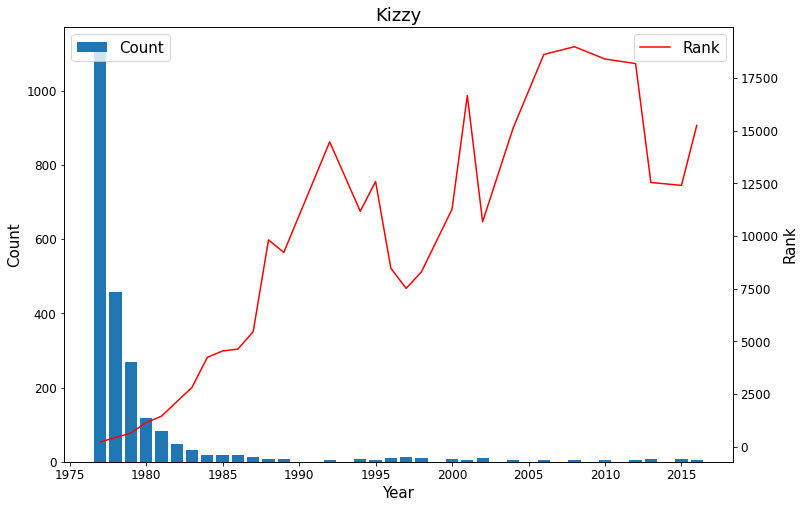

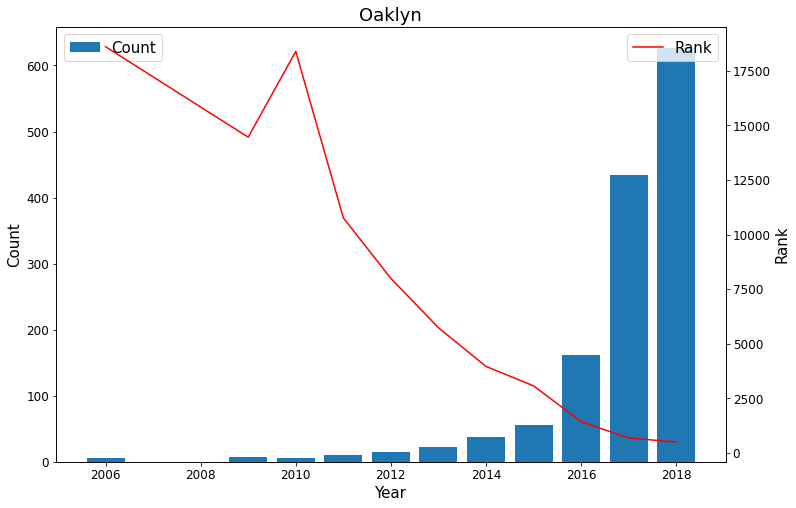

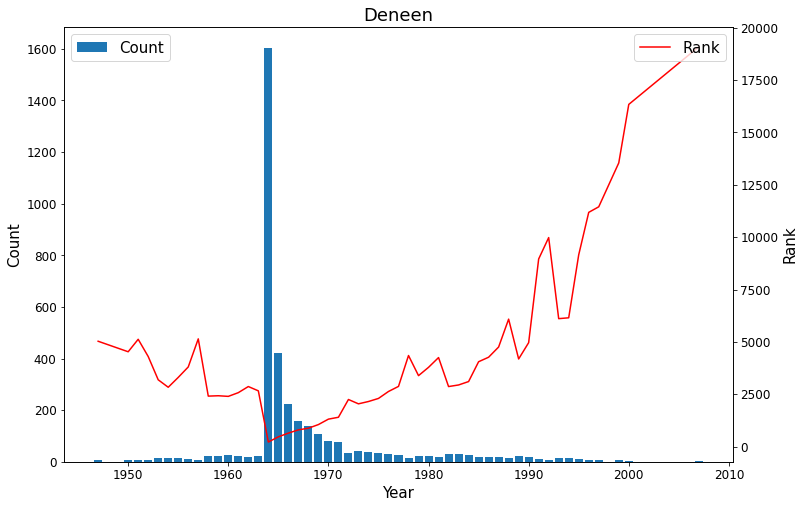

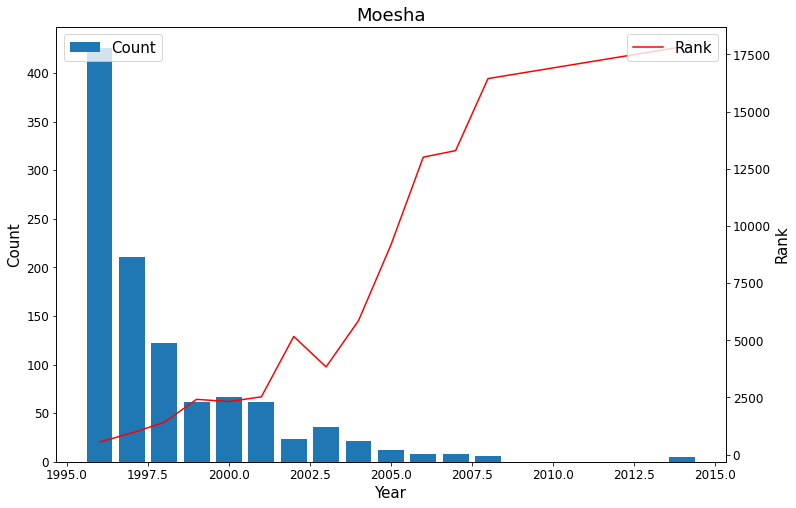

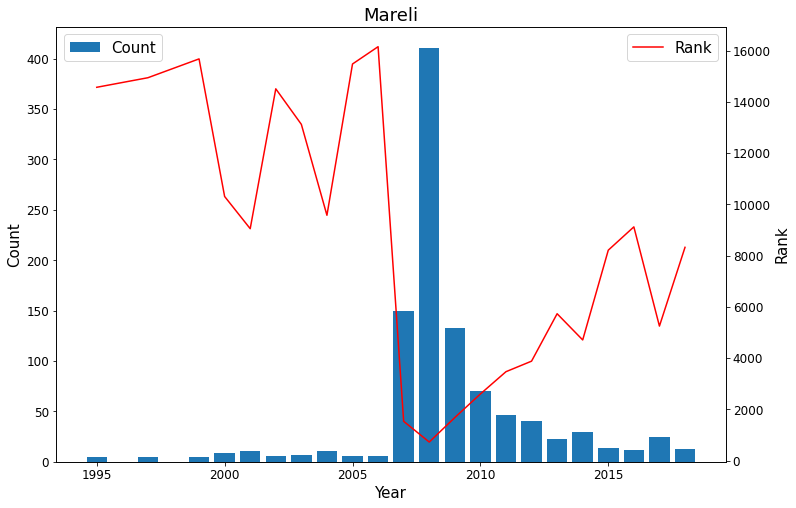

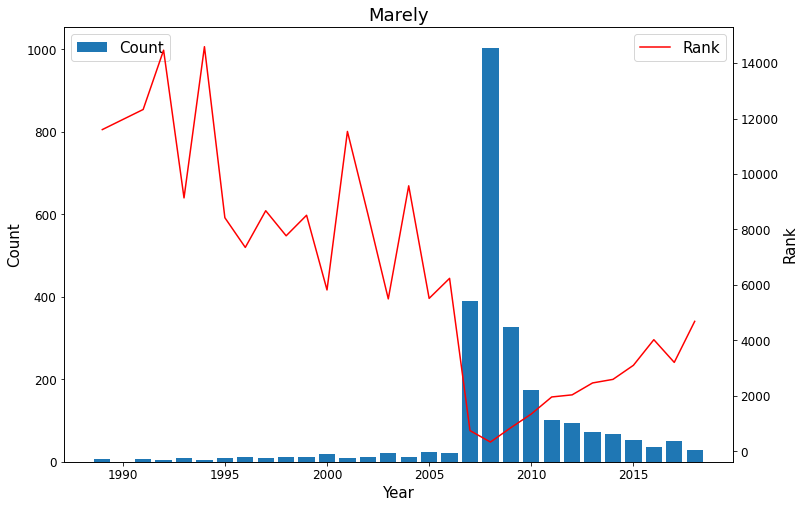

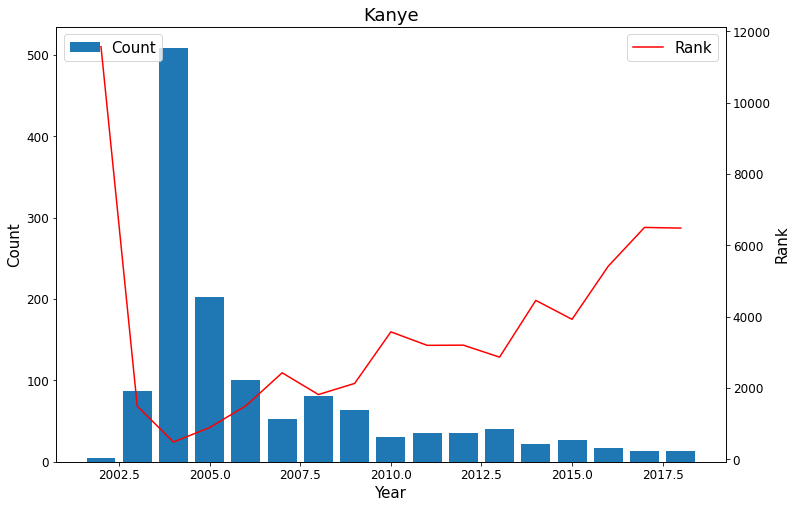

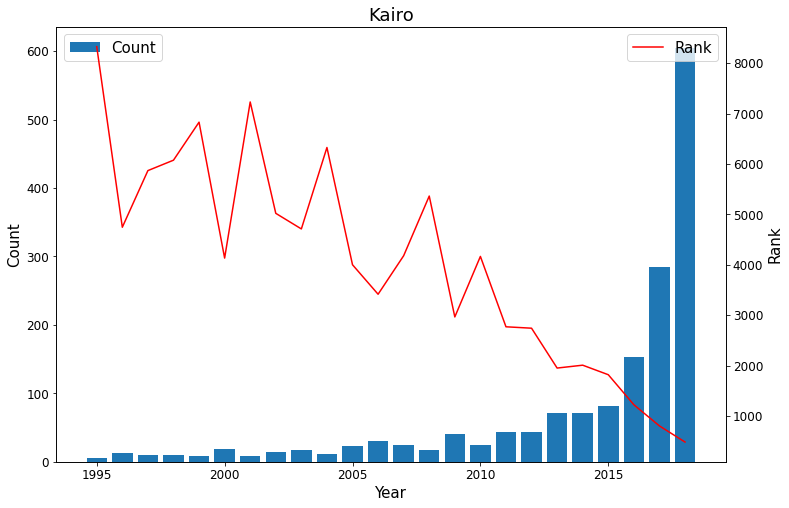

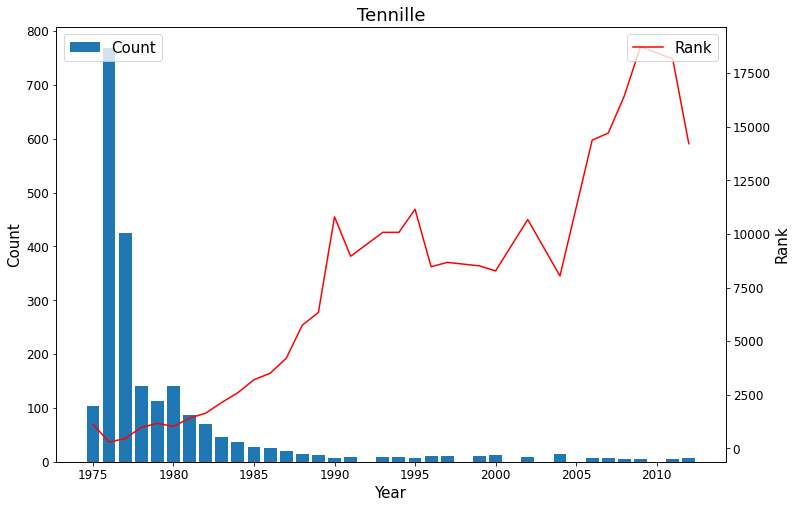

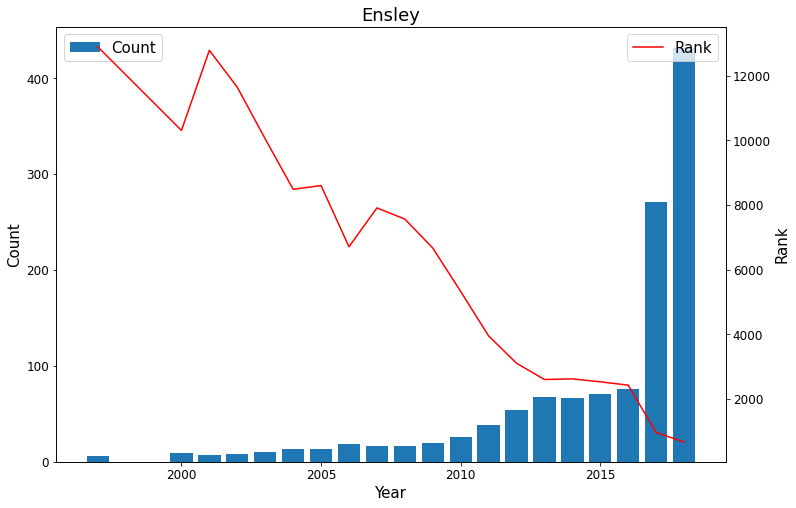

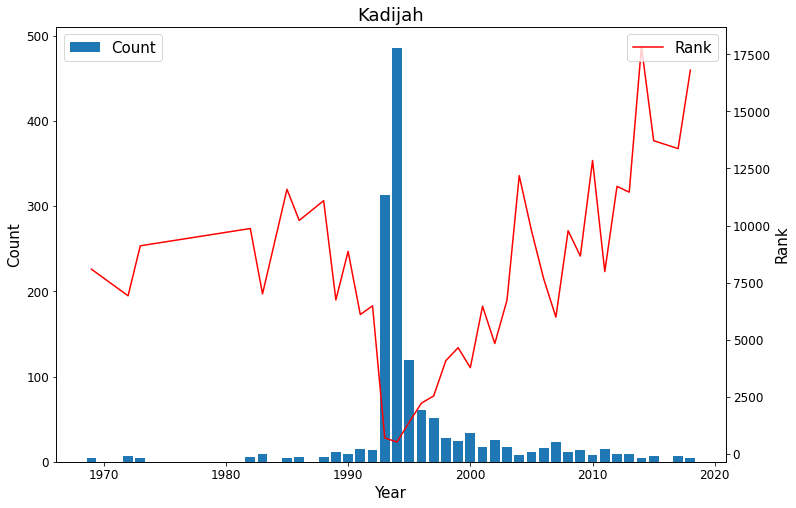

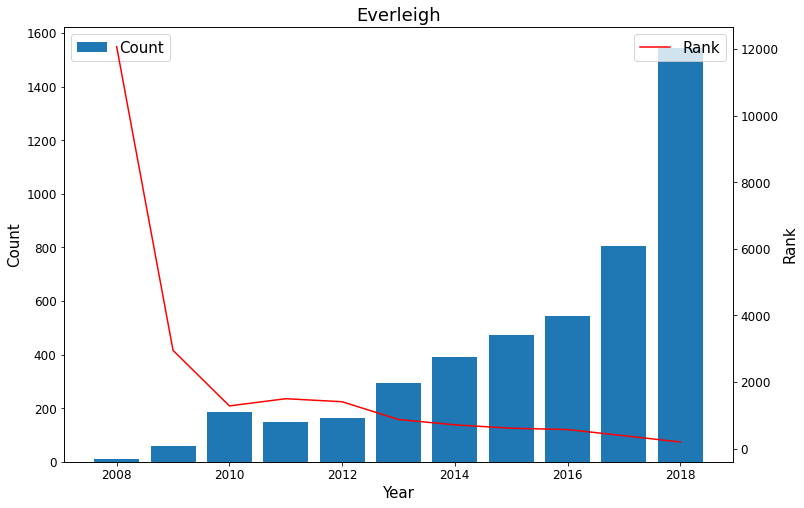

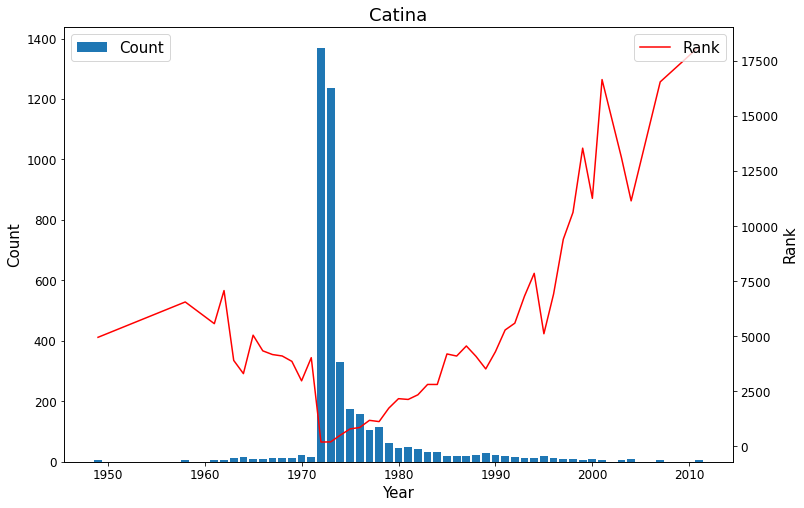

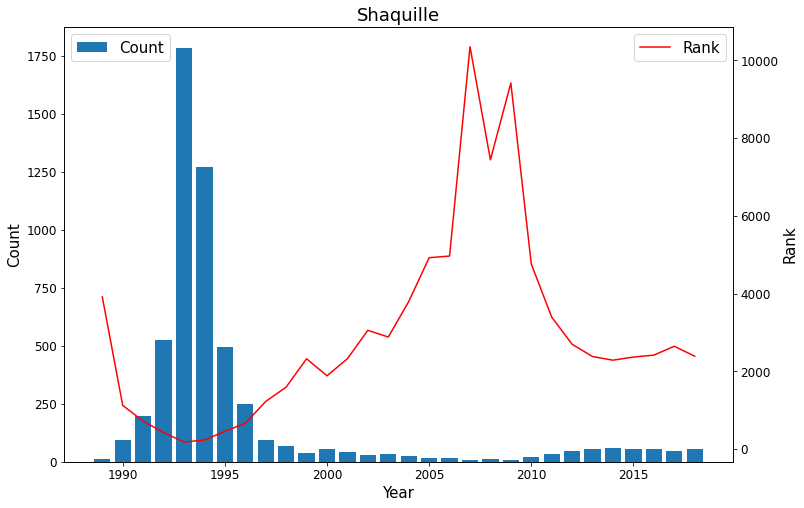

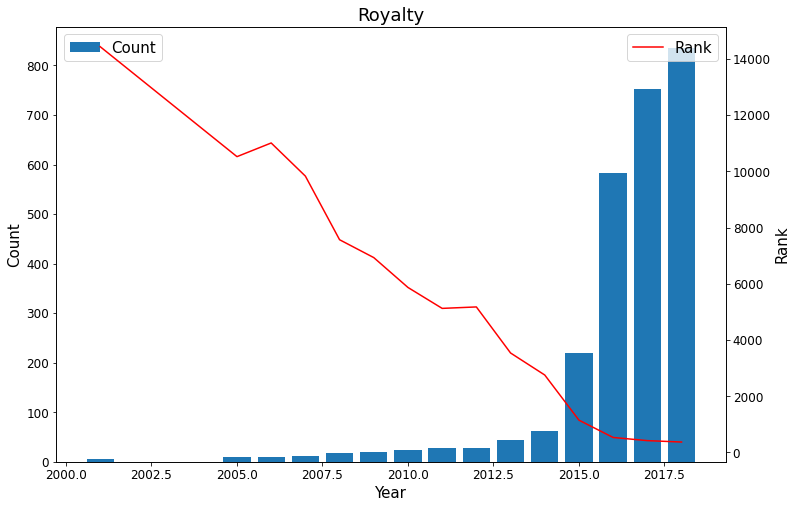

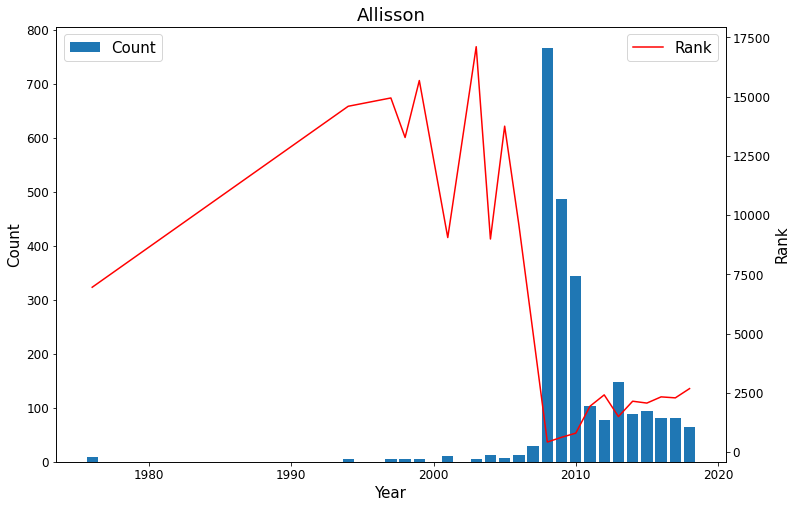

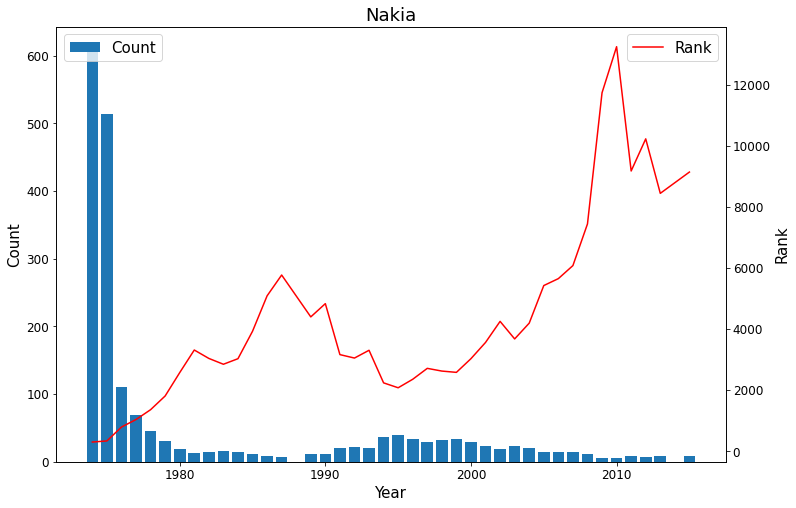

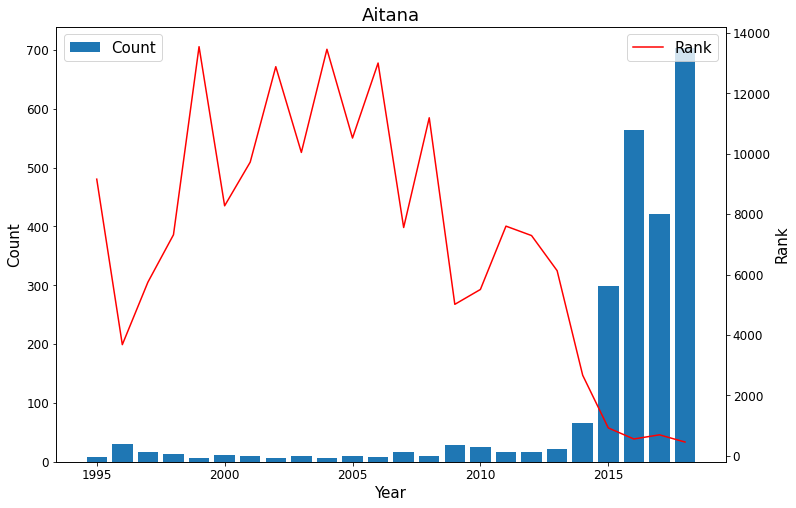

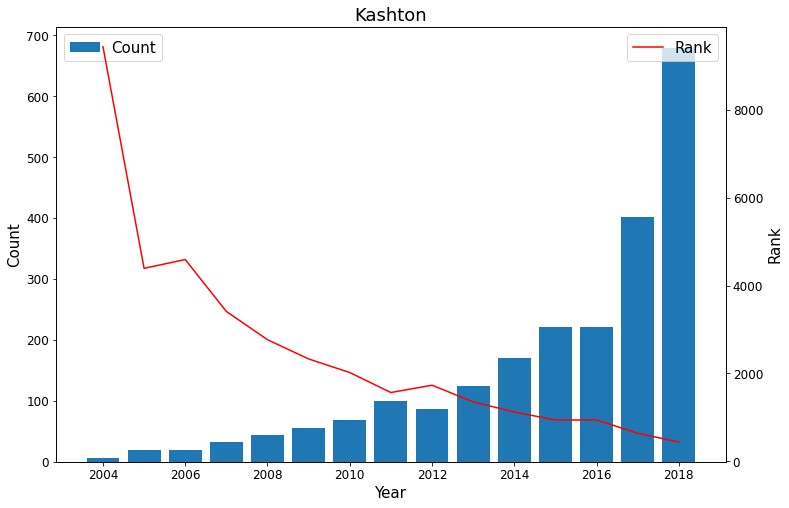

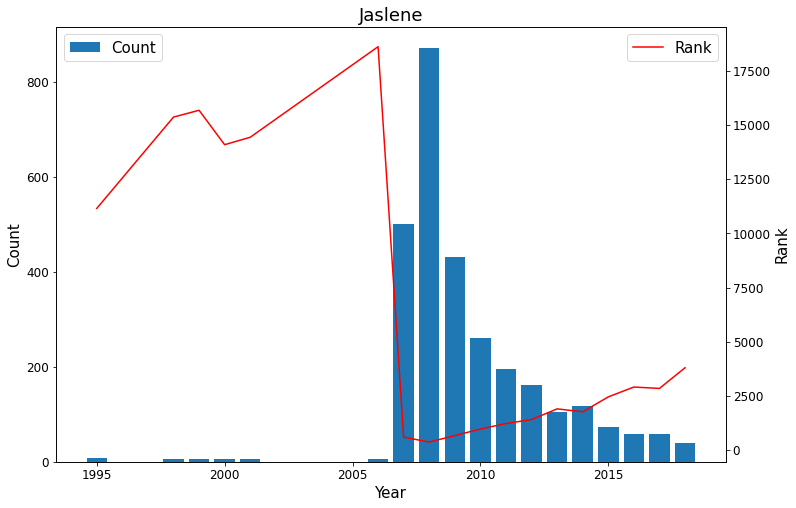

In [96]:
for name in l2:
    plot_name(name = name[0], gender = name[1], crit = "Count")

## Most Popular Unisex Names

In [97]:
df[df.Name == "Mary"].groupby(["Name", "Gender"]).Count.sum()

Name  Gender
Mary  F         4125675
      M           15165
Name: Count, dtype: int64

In [98]:
df.groupby(["Name", "Gender"]).Count.sum().unstack()

Gender,F,M
Name,,
Aaban,nan,114
Aabha,35,nan
Aabid,nan,16
Aabidah,5,nan
Aabir,nan,10
...,...,...
Zyvion,nan,5
Zyvon,nan,7
Zyyanna,6,nan


In [99]:
unisex = df.groupby(["Name", "Gender"]).Count.sum().unstack()
unisex

Gender,F,M
Name,,
Aaban,nan,114
Aabha,35,nan
Aabid,nan,16
Aabidah,5,nan
Aabir,nan,10
...,...,...
Zyvion,nan,5
Zyvon,nan,7
Zyyanna,6,nan


In [100]:
unisex.dropna(inplace = True)

In [101]:
unisex

Gender,F,M
Name,,
Aaden,5,4828
Aadi,16,851
Aadyn,16,516
Aalijah,149,212
Aaliyah,87442,96
...,...,...
Zyion,168,918
Zyon,620,2638
Zyonn,5,40


In [102]:
unisex.min(axis = 1).sort_values(ascending = False)

Name
Willie     146156
Jordan     131004
Leslie     112726
Taylor     110390
Jessie     110212
            ...  
Chrisley        5
Mclane          5
Mckinly         5
Mckenly         5
Aaden           5
Length: 10773, dtype: float64

In [103]:
unisex_names = unisex.min(axis = 1).sort_values(ascending = False).index
unisex_names

Index(['Willie', 'Jordan', 'Leslie', 'Taylor', 'Jessie', 'Terry', 'Angel',
       'Riley', 'Jamie', 'Kelly',
       ...
       'Meher', 'Mehan', 'Medley', 'Chrishaun', 'Mcrae', 'Chrisley', 'Mclane',
       'Mckinly', 'Mckenly', 'Aaden'],
      dtype='object', name='Name', length=10773)

In [104]:
unisex.loc[unisex_names].head(20)

Gender,F,M
Name,,
Willie,146156,448946
Jordan,131004,374513
Leslie,267081,112726
Taylor,320446,110390
Jessie,167462,110212
Terry,96895,422916
Angel,95710,231800
Riley,106901,94278
Jamie,268102,85631


In [105]:
unisex = unisex[unisex.min(axis = 1) > 10000]
unisex

Gender,F,M
Name,,
Addison,121435,12895
Adrian,15258,237044
Alexis,338333,63604
Amari,14415,17932
Angel,95710,231800
...,...,...
Tommie,17415,34210
Tracy,250853,61223
Tyler,16585,587571


In [106]:
abs(unisex.F.div(unisex.M).sub(1)).sort_values()

Name
Elisha       0
Quinn        0
Kerry        0
Blair        0
Kris         0
            ..
Stacey      10
Courtney    10
Jean        18
Ashley      53
Mary       271
Length: 116, dtype: float64

In [107]:
unisex_names2 = abs(unisex.F.div(unisex.M).sub(1)).sort_values().index
unisex_names2

Index(['Elisha', 'Quinn', 'Kerry', 'Blair', 'Kris', 'Robbie', 'Justice',
       'Riley', 'Emerson', 'Jackie',
       ...
       'Sandy', 'Stacy', 'Carmen', 'Shelby', 'Addison', 'Stacey', 'Courtney',
       'Jean', 'Ashley', 'Mary'],
      dtype='object', name='Name', length=116)

In [108]:
unisex.loc[unisex_names2].head(20)

Gender,F,M
Name,,
Elisha,13762,13595
Quinn,31670,32071
Kerry,48549,49646
Blair,14922,14527
Kris,13504,14055
Robbie,22290,20926
Justice,16354,17580
Riley,106901,94278
Emerson,20904,24472
